In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Visualizing Distributions

In R, categorical variables are usually saved as factors or characters vectors. To examine a categorical variable, use a bar chart.

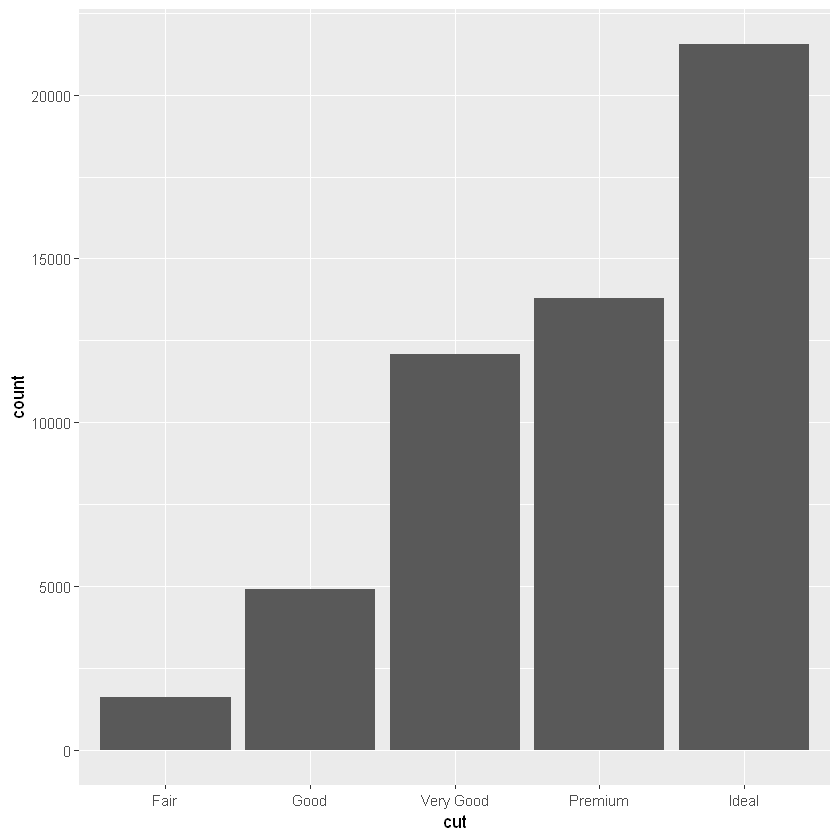

In [2]:
ggplot(diamonds, aes(cut)) + geom_bar()

The height of the bars displays how many observations occured with each x value. These values can also be manually computed as : 
dplyr::count()

In [3]:
diamonds %>% count(cut)

cut,n
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


To  examine the distribution of a continuous variable, use a histogram.

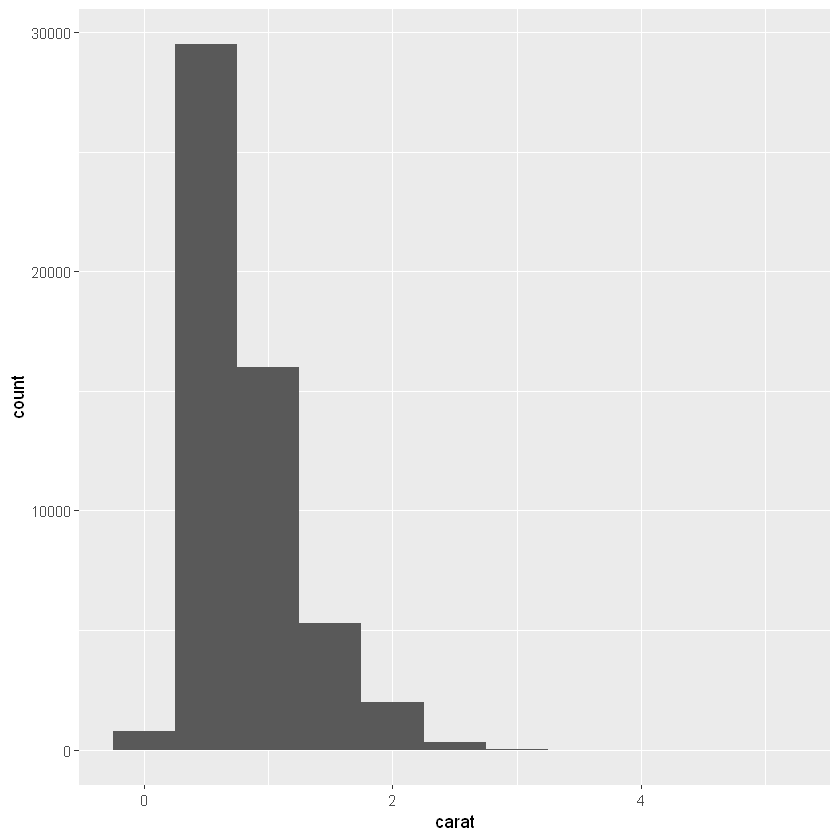

In [4]:
ggplot(diamonds, aes(carat)) + geom_histogram(binwidth = 0.5)

It can be computed manually by combining dplyr::count() and ggplot2:cut_width().

In [5]:
diamonds %>% count(cut_width(carat, 0.5))

"cut_width(carat, 0.5)",n
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4
"(4.25,4.75]",1


Set the width of the intervals in a histogram with the "binwidth" argument, which is measured in the units of the x variable. Explore a variety of binwidths, different binwidths can reveal different patterns.

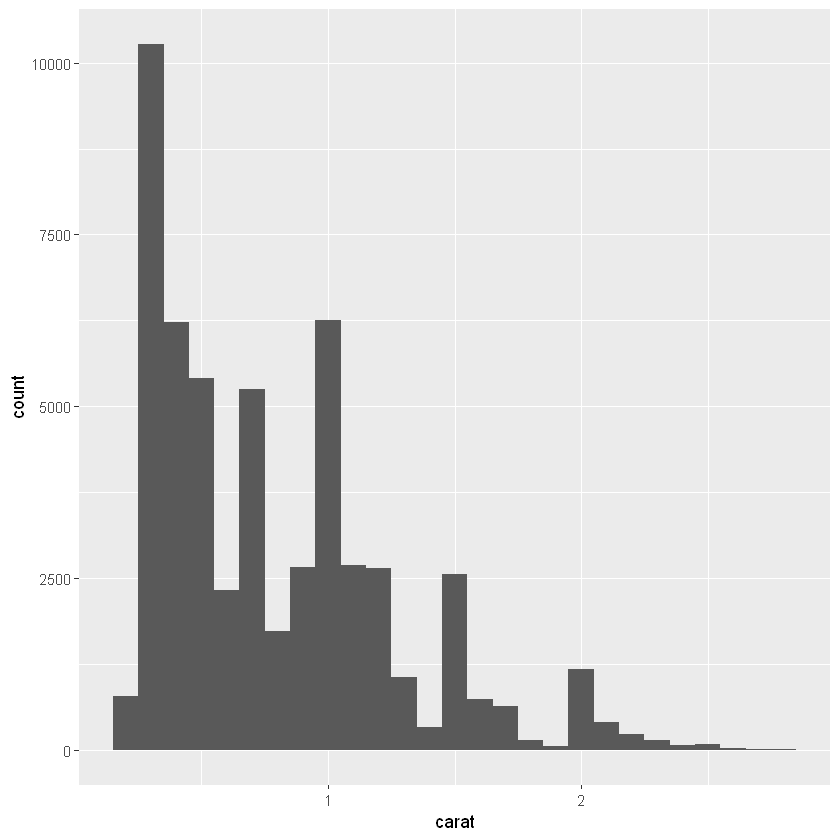

In [6]:
smaller_diamonds <- diamonds %>% 
    filter(carat < 3)

ggplot(smaller_diamonds, aes(carat)) + geom_histogram(binwidth = 0.1)

In case of overlaying multiple histograms in a single plot, geom_freqpoly() function is recommended. geom_freqpoly() performs the calculations as geom_histogram(), but instead of displaying the count with bars, uses lines instead.

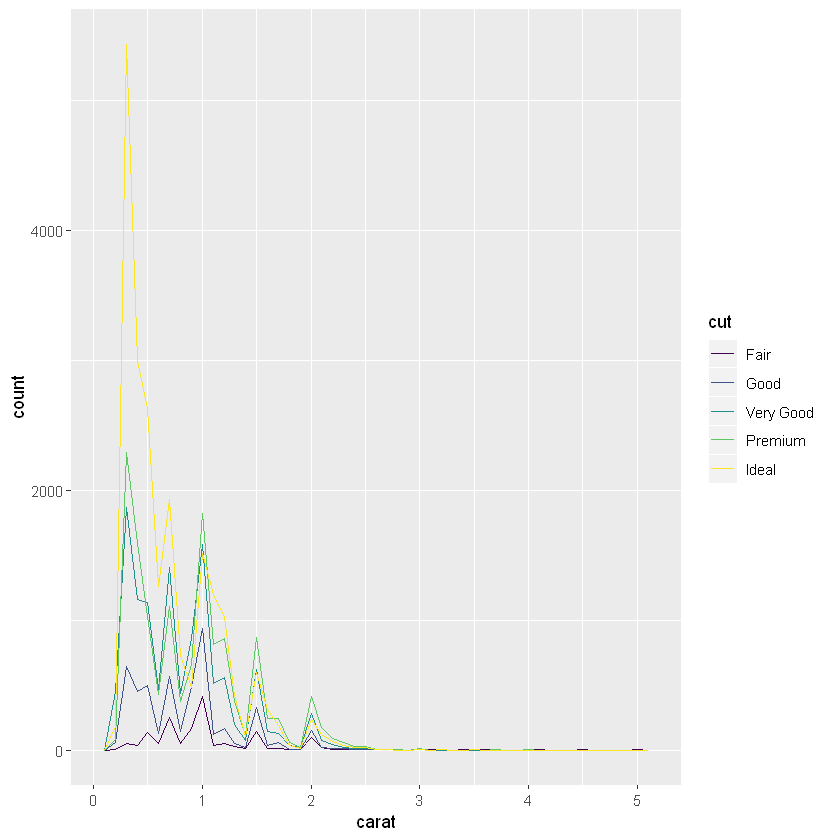

In [7]:
ggplot(diamonds, aes(carat, color = cut)) + geom_freqpoly(binwidth = 0.1)

# Typical Values

In both bar charts and histograms, tall bars show the common values of a variable, and shorter bars show less-common values.

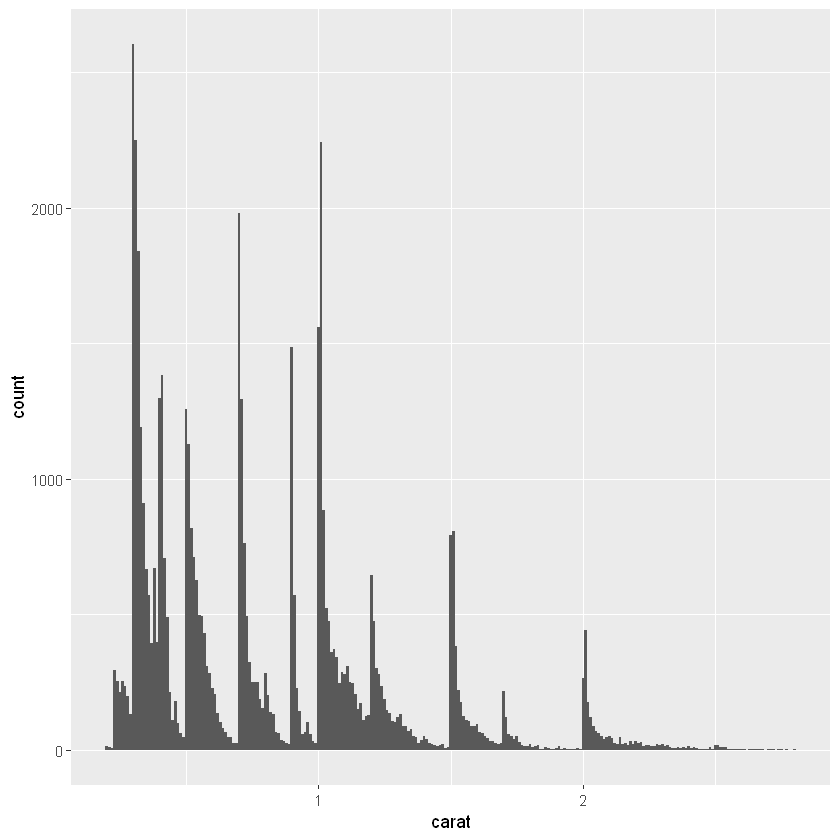

In [8]:
ggplot(smaller_diamonds, aes(carat)) + 
    geom_histogram(binwidth = 0.01)

Several questions suggeated by the above histogram are:
* Why are there more diamonds at whole carats and common fractions of carats?
* Why are there more diamonds slightly to teh right of each peak than there are slightly to the left of each peak?
* Why are there no diamonds bigger than 3 carats?

In general clusters of similar values suggest that subgroups exist in the dataset. To understand the subgroups, ask following questions:
* How are the observations within each cluster similar to each other?
* How are the observations in different clusters different from each other?
* How can you explain or describe the clusters?
* Why might the appearance of clusters be misleading?

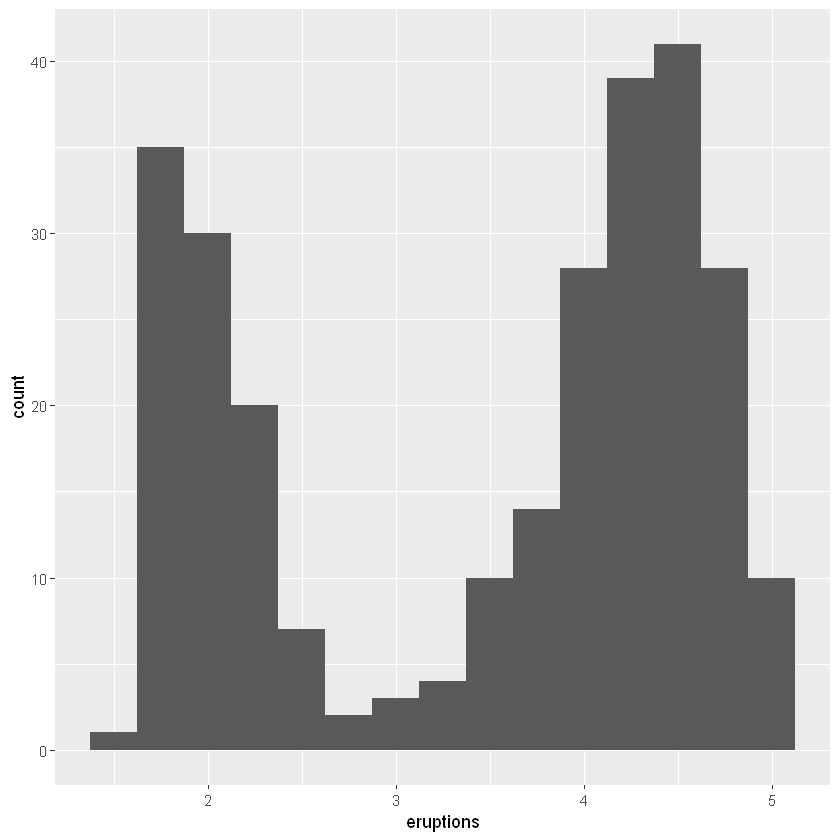

In [9]:
ggplot(faithful, aes(eruptions)) + 
    geom_histogram(binwidth = 0.25)

The above histogram displays the lenght in minutes of 272 eruptions of the Old Faithful Geyser in Yellowstone National Park. Eruptioins times appears to be clustered into two groups: there are short eruptions (of around 2  minutes), and long eruptions (4-5 minutes), but a little in middle

# Unusual Values

Outliers are observations that are unusual; datapoints that do not seem to fit the pattern. Sometimes outliers are data entry errors, other times outliers suggest important new science.

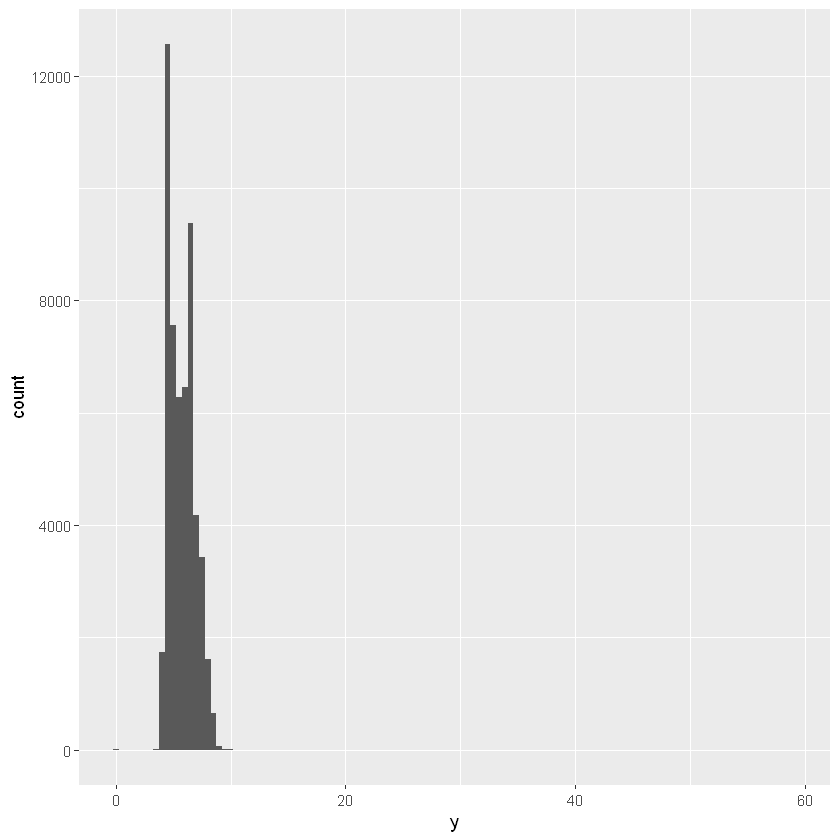

In [10]:
ggplot(diamonds, aes(y)) + 
    geom_histogram(binwidth = 0.5)

The only evidence of outliers in the above plot is the unusualy wide limits on the y-axis. There are so many observations in the common bins that the rare bins are so short that they can't be seen (although staring intensely at 0 shows some spot). To visualize unusual values, zoom into small-values of the y-axis with coord_cartesian().

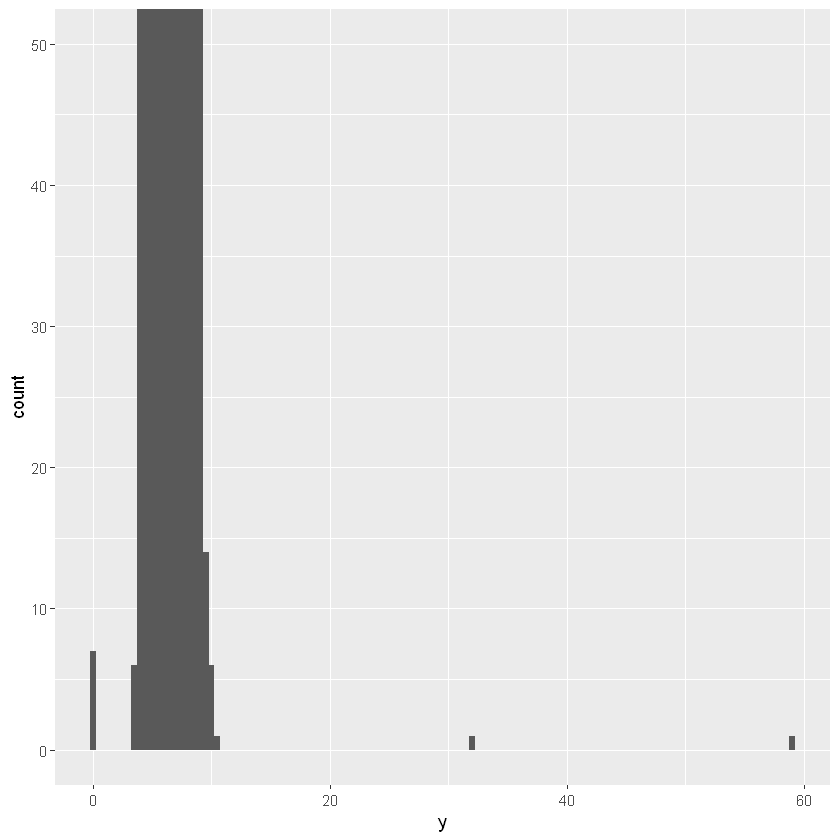

In [11]:
ggplot(diamonds, aes(y)) +
    geom_histogram(binwidth = 0.5) +
    coord_cartesian(ylim = c(0, 50))

coord_cartesian() also has an xlim() argument for zoom into the x-axis. ggplot2 also has xlim() and ylim() functions that work slightly differently: they throw away the data outside the limits.

The above histogram shows us that there are 3 unusual values: 0, ~30, and ~60, pluck them out with dplyr.

In [12]:
(unusual_y <- diamonds %>%
    filter(y < 3 | y > 20) %>%
    arrange(y))

carat,cut,color,clarity,depth,table,price,x,y,z
1.00,Very Good,H,VS2,63.3,53,5139,0.00,0.0,0.00
1.14,Fair,G,VS1,57.5,67,6381,0.00,0.0,0.00
1.56,Ideal,G,VS2,62.2,54,12800,0.00,0.0,0.00
1.20,Premium,D,VVS1,62.1,59,15686,0.00,0.0,0.00
2.25,Premium,H,SI2,62.8,59,18034,0.00,0.0,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,0.0,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,0.0,0.00
0.51,Ideal,E,VS1,61.8,55,2075,5.15,31.8,5.12
2.00,Premium,H,SI2,58.9,57,12210,8.09,58.9,8.06


"y" variable measures one of the three dimensions of these diamonds, in mm. The diamonds can't have a width of 0mm, so these values must be incorrect. Also, measurements of 32mm and 59mm are implausible: those diamonds are over an inch long, but don't cost hundreds of thousands of dollars.

It's good to repeat the analysis with and without the outliers. If they have minimal effect on the results, reasonalble to replace them with missing values. If they have substantial effect on results, then they should't be dropped without justification.

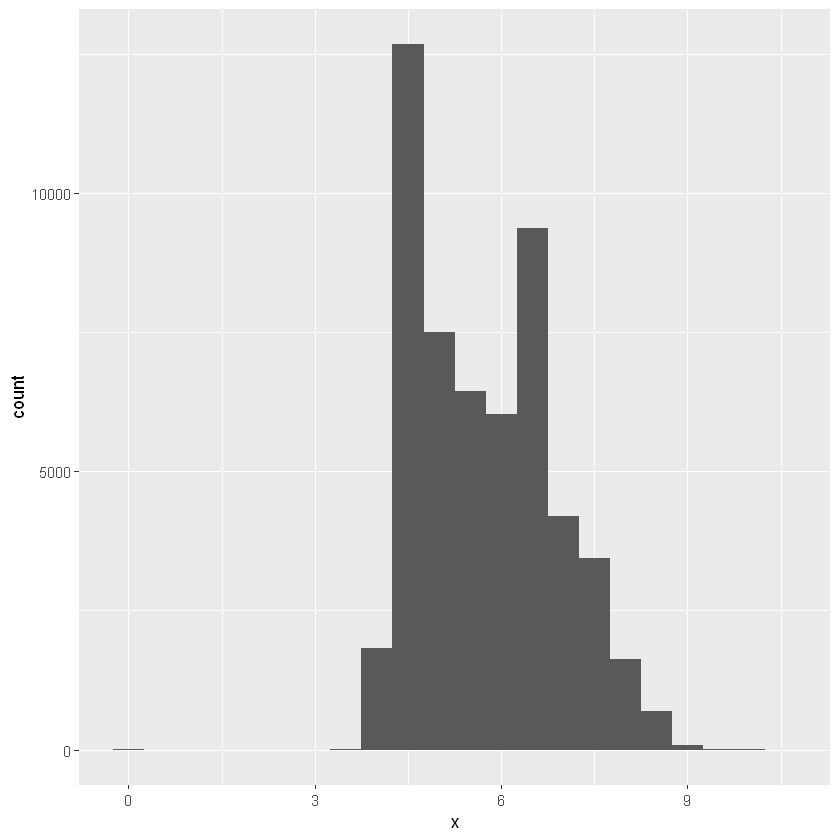

In [13]:
ggplot(diamonds, aes(x)) + 
    geom_histogram(binwidth = 0.5)

In the above graph shows of outliers at 0, use coord_cartesian() function to visualize them.

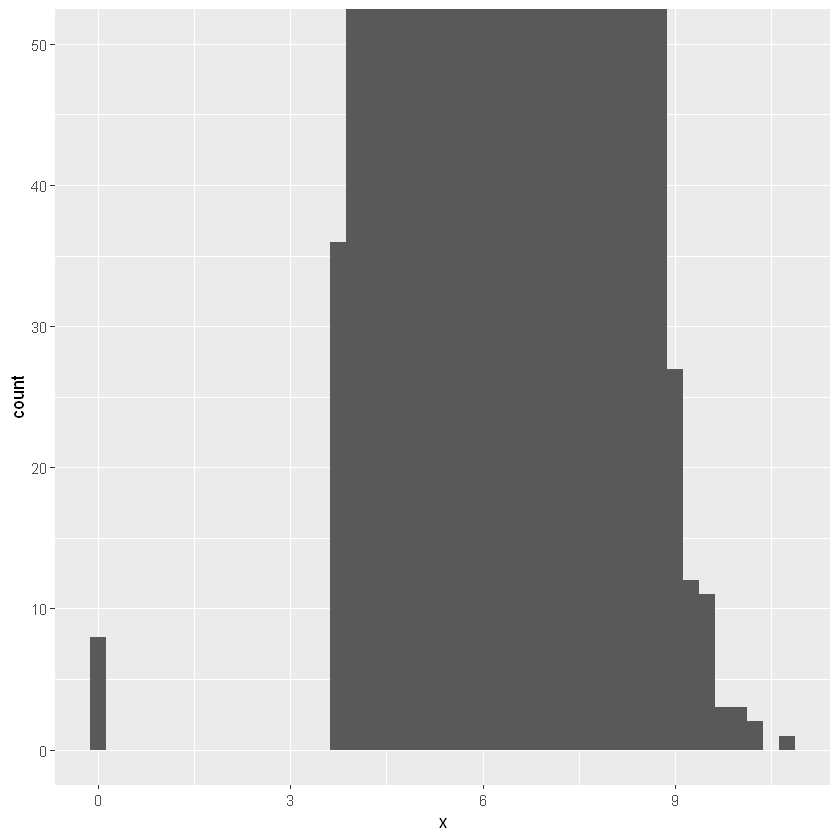

In [14]:
ggplot(diamonds, aes(x)) + 
    geom_histogram(binwidth = 0.25) + 
    coord_cartesian(
        ylim = c(0, 50)
    )

No, dimension of a diamond can be 0, so the datapoints at 0 are only data-entry errors, remove them with dplyr.

In [15]:
(unusual_x <- diamonds %>%
    filter(x < 3) %>%
    arrange(x))

carat,cut,color,clarity,depth,table,price,x,y,z
1.07,Ideal,F,SI2,61.6,56,4954,0,6.62,0
1.00,Very Good,H,VS2,63.3,53,5139,0,0.00,0
1.14,Fair,G,VS1,57.5,67,6381,0,0.00,0
1.56,Ideal,G,VS2,62.2,54,12800,0,0.00,0
1.20,Premium,D,VVS1,62.1,59,15686,0,0.00,0
2.25,Premium,H,SI2,62.8,59,18034,0,0.00,0
0.71,Good,F,SI2,64.1,60,2130,0,0.00,0
0.71,Good,F,SI2,64.1,60,2130,0,0.00,0


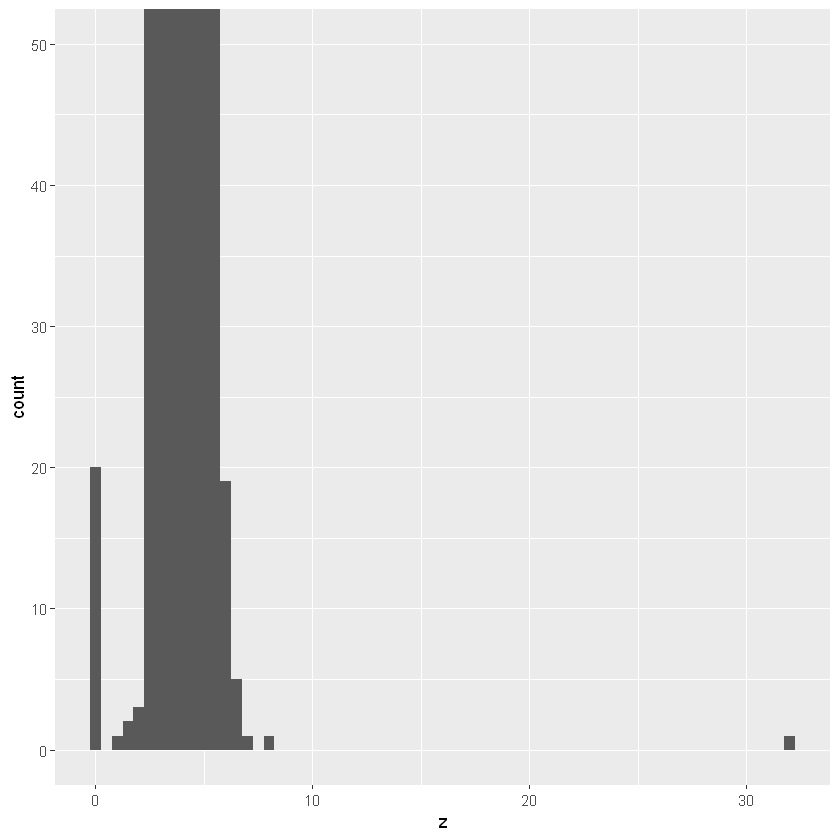

In [16]:
ggplot(diamonds, aes(z)) + 
    geom_histogram(binwidth = 0.5) + 
    coord_cartesian(
        ylim = c(0, 50)
    )

In [17]:
(unusual_z <- diamonds %>%
    filter(z < 2 | z > 20) %>%
    arrange(z))

carat,cut,color,clarity,depth,table,price,x,y,z
1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00
1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00
1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00
1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00
1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00
1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.00
1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.00


The "z" variable having value 0 or > 20 are outliers as they don't add up a lot to th results of the analysis.

In [18]:
count(diamonds, carat == 0.99) # Count of diamonds with 0.99 carat.
count(diamonds, carat == 1)    # Count of diamonds with 1 carat.
count(diamonds, carat == 1.1)  # Count of diamonds with 1.1 carat.

carat == 0.99,n
FALSE,53917
TRUE,23


carat == 1,n
FALSE,52382
TRUE,1558


carat == 1.1,n
FALSE,53662
TRUE,278


The number of diamonds with 1 carat is very large than 1.1 or 0.99 carat as the count of ideal cuts is maximum (the barchart of cut variable shows the same).

# Missing Values

Whenever encountered unusual values in the dataset, you've two options:

* Drop the entire row with strange values.

In [19]:
head(diamonds2 <- diamonds %>% 
    filter(between(y, 3, 20)))

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


This option is not recommended as just because one measurement is invalid, doesn't means all of the measurements are.

* Second option is to replace unusual values with missing values. Use mutate() to replace the variable with a modified copy. Also, use ifelse() function to replace unusual values with NA.

In [20]:
head(diamonds2 <- diamonds %>% 
    mutate(y = ifelse(y<3 | y>20, NA, y)))

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


ifelse() has three arguments:
* First is the condition (a logical vector).
* The result will contain the second argument when test is TRUE.
* And, the value of third argument when test is FALSE.

Like R, ggplot2 subscribes to the philosophy that missing values shouldn't silently go missing. Its not obvious where you should plot missing values, so ggplot2 doesn't include them in the plot, but it do warn that tey have been removed:

Warning message:
"Removed 9 rows containing missing values (geom_point)."

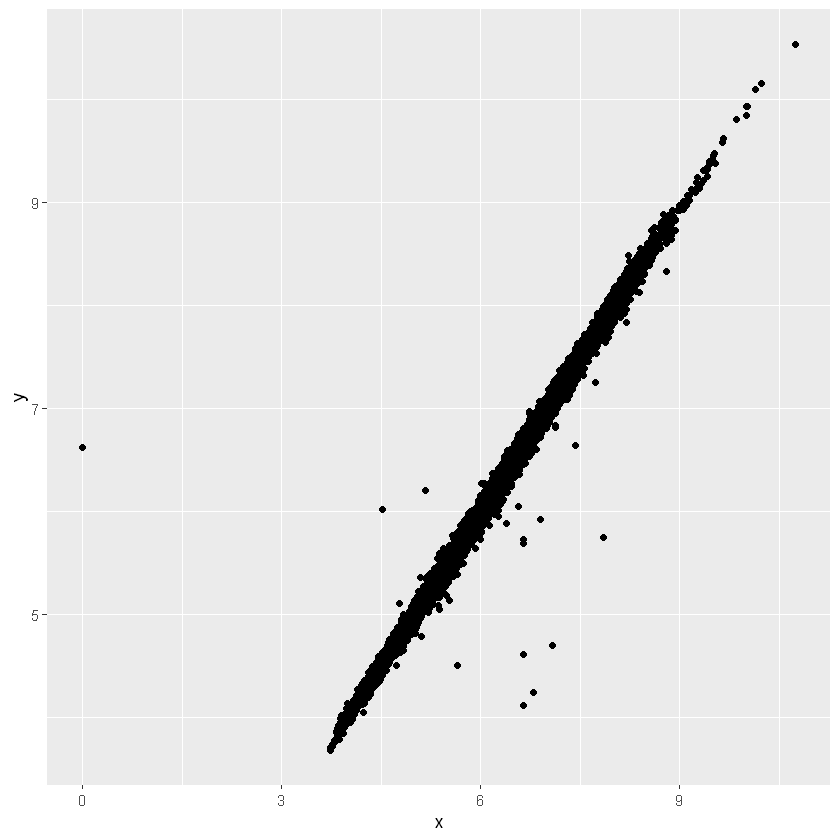

In [21]:
ggplot(diamonds2, aes(x, y)) +
    geom_point()

To subpress the warning, set na.rm = TRUE.

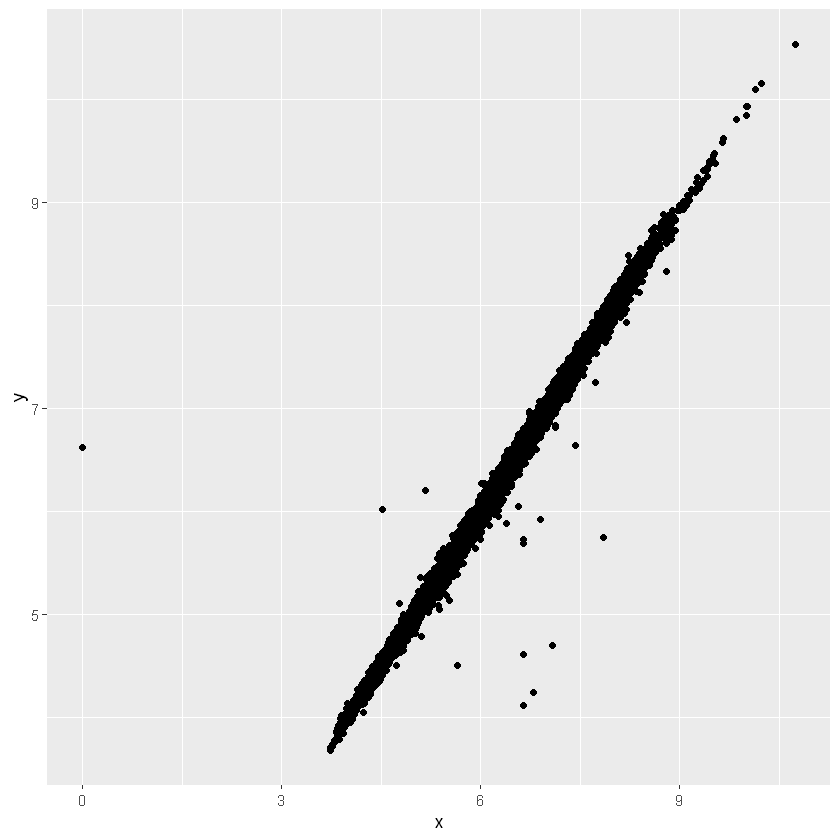

In [22]:
ggplot(diamonds2, aes(x,y)) +
    geom_point(na.rm = TRUE)

To understand what makes observations with missing values different from observation with recorded values. Like, in the nycflights13::fligths dataset, flights with the missing dep_time variable indicate the flight was cancelled. So, to compare the scheduled departure times for cancelled and noncancelled times create a new variable with is.na().

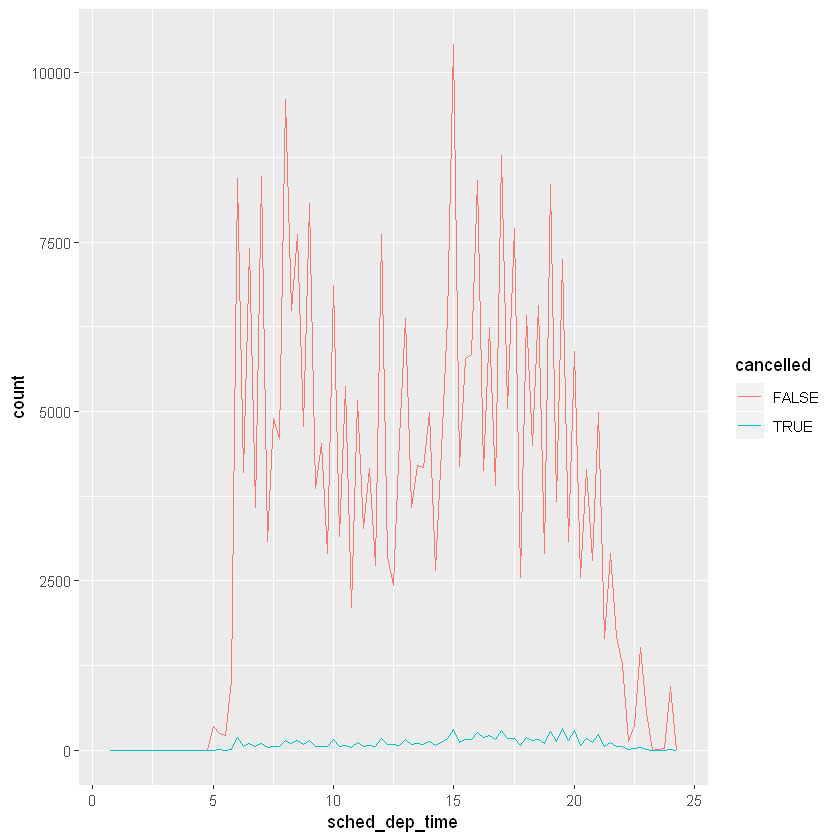

In [23]:
nycflights13::flights %>% 
    mutate(
        cancelled = is.na(dep_time),
        sched_hour = sched_dep_time %/% 100,
        sched_min = sched_dep_time %% 100,
        sched_dep_time = sched_hour + sched_min / 60
    ) %>% 
    ggplot(aes(sched_dep_time)) +
        geom_freqpoly(
            mapping = aes(color = cancelled),
            binwidth = 1/4
        )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 9 rows containing non-finite values (stat_bin)."

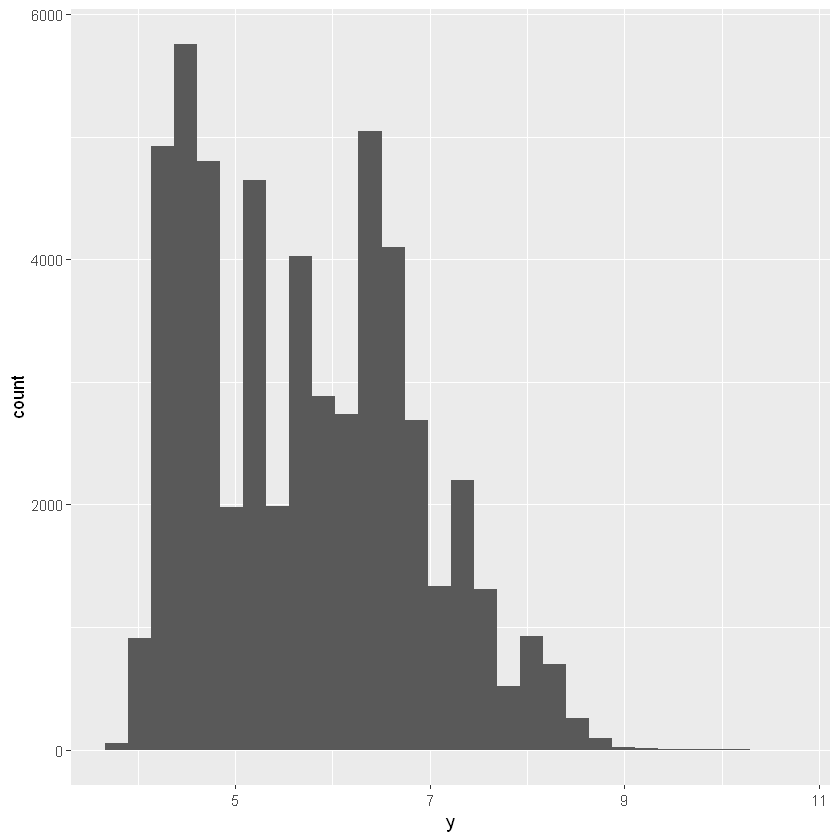

In [24]:
ggplot(diamonds2, aes(y)) + 
    geom_histogram()

In a histogram the missing values are removed when the number of observations are calculated for each bins (see the warning message in the plot above).

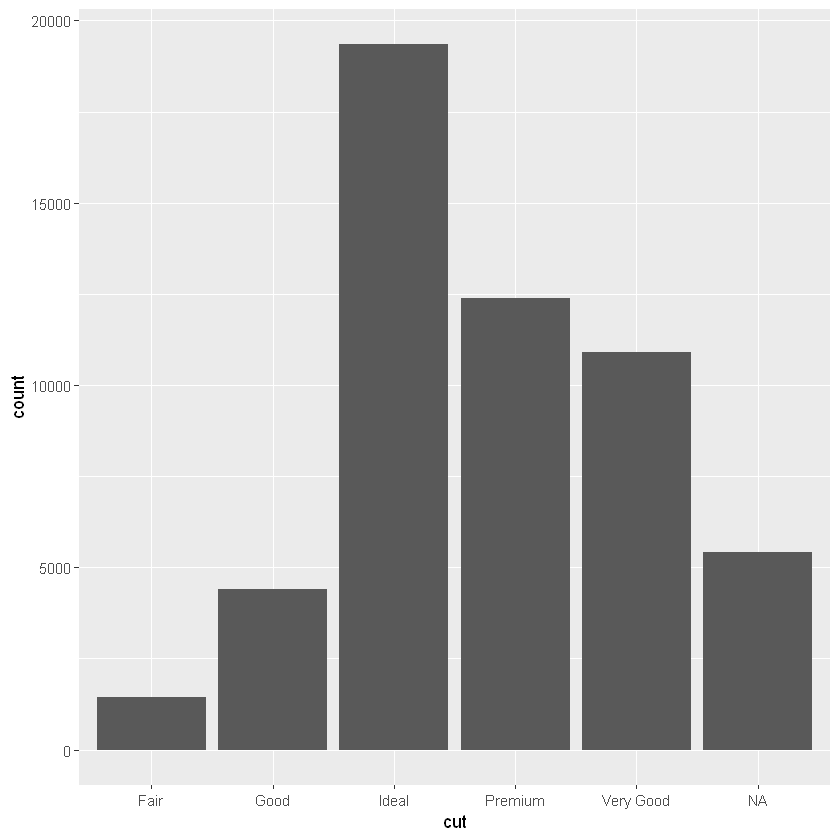

In [25]:
diamonds %>% 
    mutate(cut = ifelse(runif(n()) < 0.1, NA, as.character(cut))) %>% 
    ggplot(aes(cut)) +
        geom_bar()

In geom_bar() function the NA is treated as another category. The x aesthetic in geom_bar requires a discrete (categorical) variable, and missing values at like another category.

In a histogram the x aesthetic variable needs to be numeric and stat_bin() ranges the observations by ranges into bins. Since the numeric value of the NA observations is unknown, they cannot be placed in a perticular bin, and are dropped.

The na.rm() = TRUE in the functions mean() and sum(), removes the NA values from the vector prior to calculating mean and sum.

# Covariation

Covariation describes the behaviour between the variables. Covariation is the tendency for the values of two or more variables to vary together in a related way. 

The best way to spot covariation is to visualize the relationship between two or more variables. Explore the distribution of a continuous variable broken down by a categorical variable.

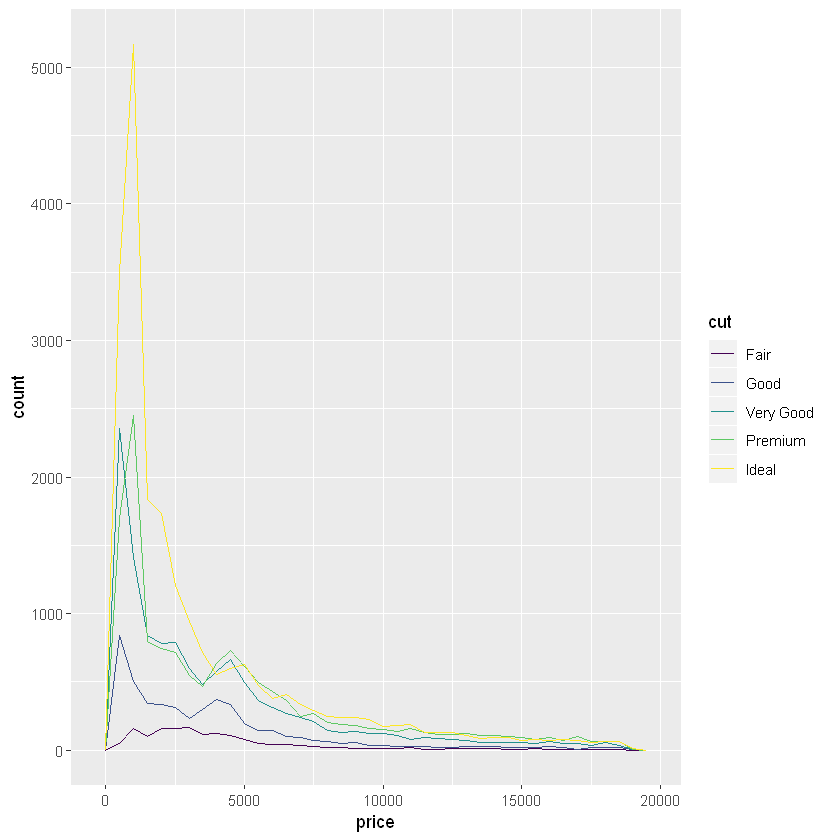

In [26]:
ggplot(diamonds, aes(price)) +
    geom_freqpoly(mapping = aes(color = cut), binwidth = 500)

The default appearance of geom_freqpoly() is not that useful for the comparison of continuous variable broken down by the categorical variable, because the height is given by the count. That means if one of the groups is much smaller than the others, its hard to see the difference in shapes. Its hard to see the difference in the above plot as the overall counts differ so much.

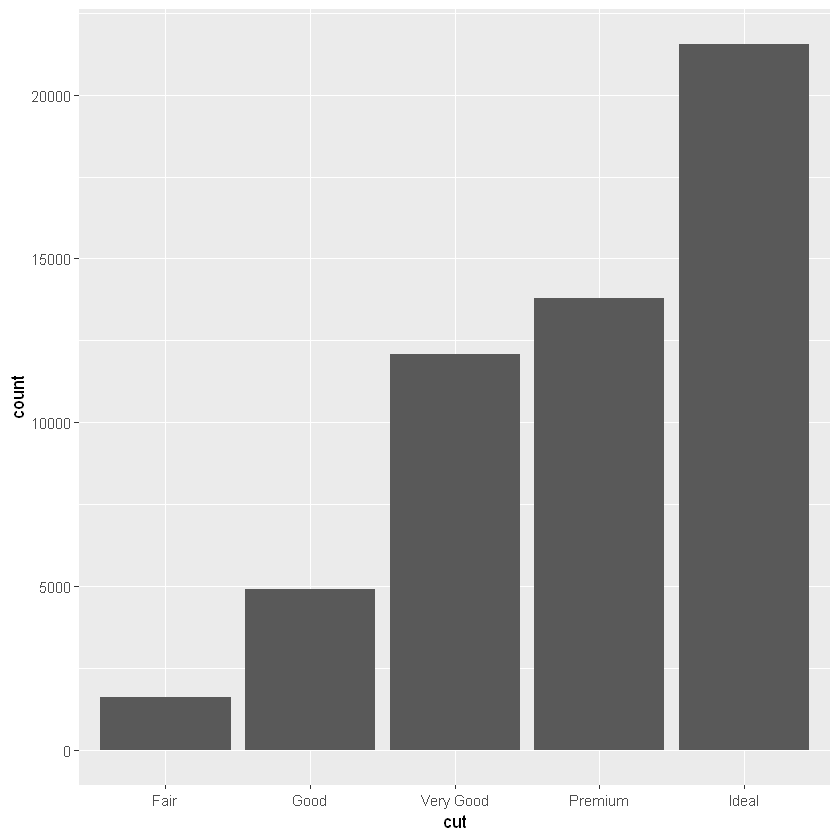

In [27]:
ggplot(diamonds, aes(cut)) + 
    geom_bar()

To make the comparison easier, swap the y-axis to display density (which is the count standardized so that the area under each frequency polygon is one) instead of count.

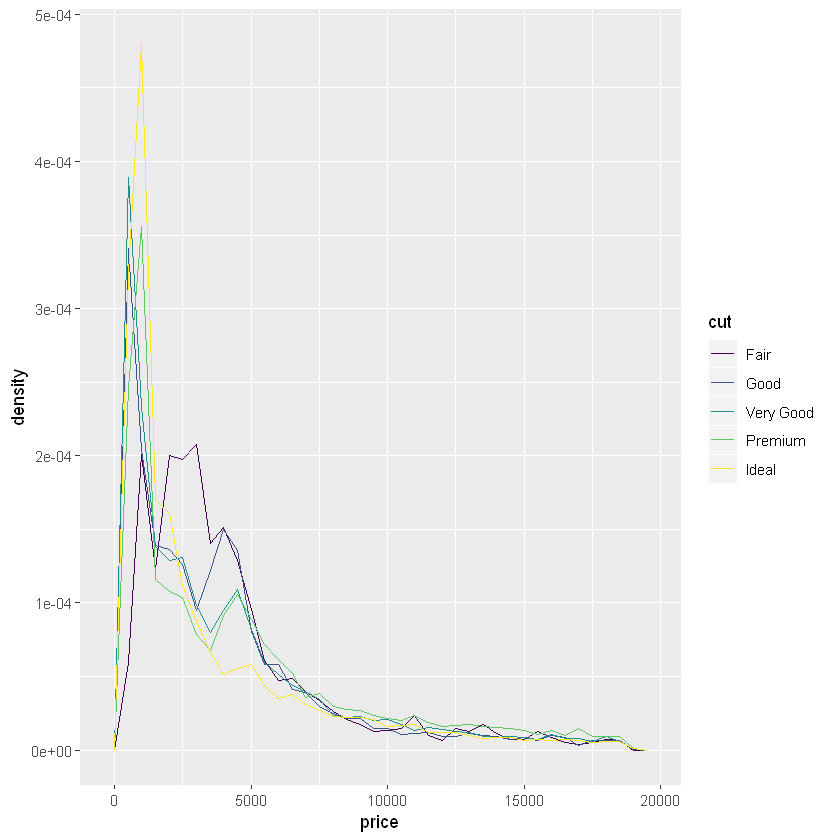

In [28]:
ggplot(diamonds, aes(price, ..density..)) +
    geom_freqpoly(mapping = aes(color = cut), binwidth = 500)

Note: There's something surprising about this plot - it appears that fair diamonds (the lowest quality) have the highest average price.

Another alternative to display the distribution of a continuous variable broken down by a categorical variable is the boxplot. A boxplot is the visual shorthand for the distribution of values. Each boxplot consists of:
* A box that stretches from 25th percentile to 75th percentile (this range is called IQR or interquantile range), and in the middle of the box lies a line that displays the median (50th percentile) of the distribution. These lines gives a sense of distirbution of data and whether or not the distribution is symmetric about the median or skewed to one side.
* Points that lie more than 1.5 times the IQR from either edge of the box are treated as ouliers, so they are plotted individually.
* A line (or whisker) that extends from each end of the box and goes to the farthest non-outlier point in the distribution.

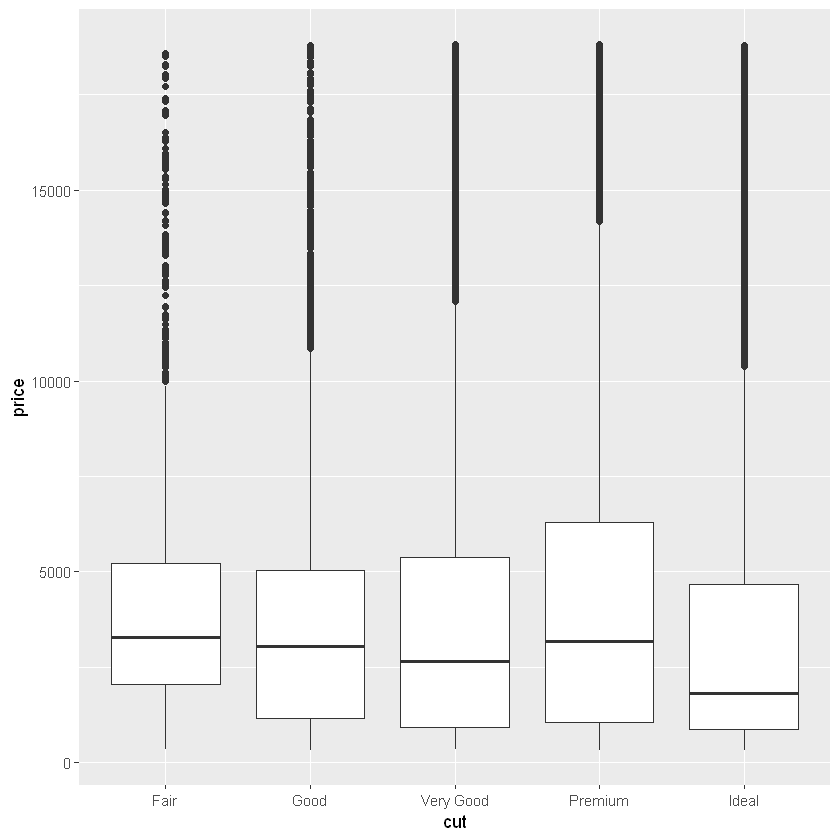

In [29]:
ggplot(diamonds, aes(cut, price)) +
    geom_boxplot()

This boxplot shows the counterintuituive finding that better quality diamonds are cheaper on average. 

The categorical variables that don't have intrinsic ordering (like, "ideal" better than "premium" better than "very good", and so on), so to reorder them to make a more informative display use reorder() function.

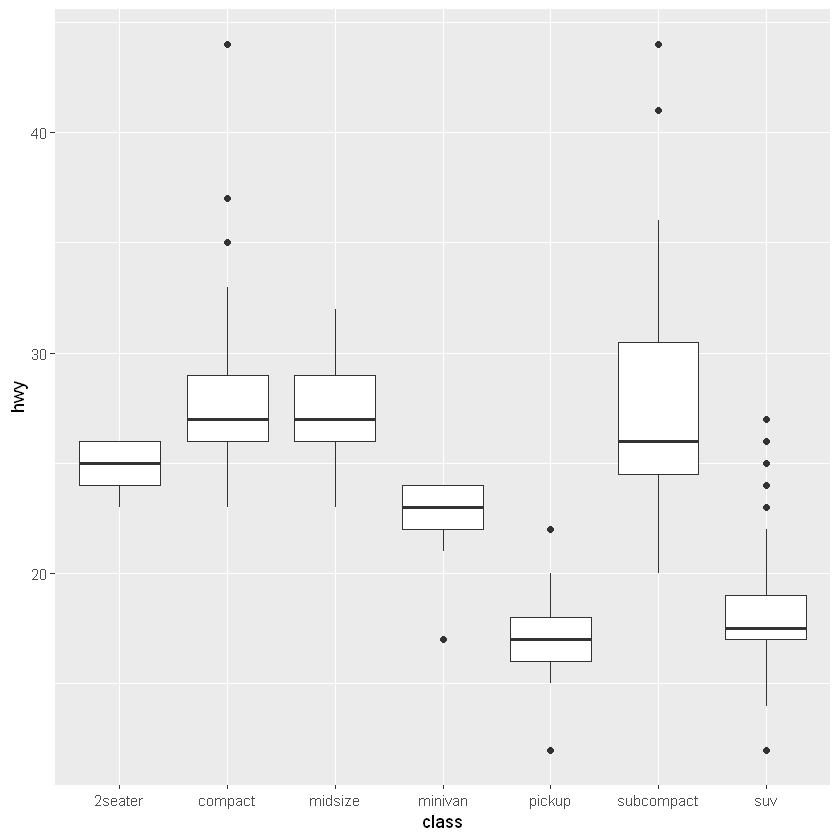

In [30]:
ggplot(mpg, aes(class, hwy)) +
    geom_boxplot()

To make the trend easier to view in the above boxplot, use reorder class based on the median value of hwy. Also, if the variable names are long then, use coord_flip() function to flip the boxplot() by 90 degrees, to have a better look at the plot.

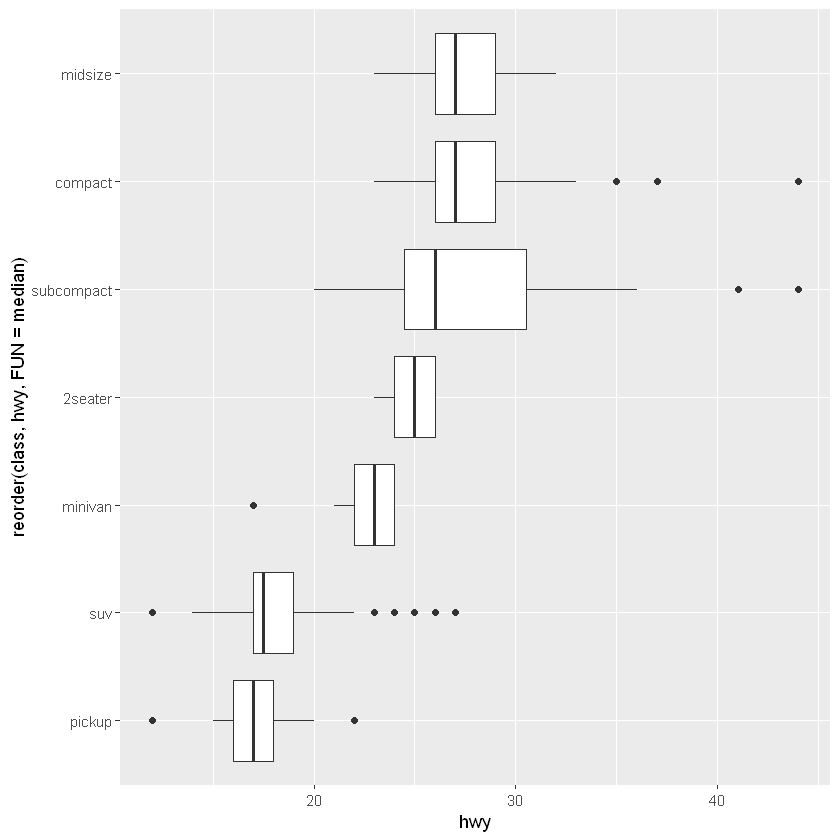

In [31]:
ggplot(mpg) +
    geom_boxplot(
        mapping = aes(
            x = reorder(class, hwy, FUN = median),
            y = hwy
        )
    ) +
    coord_flip()

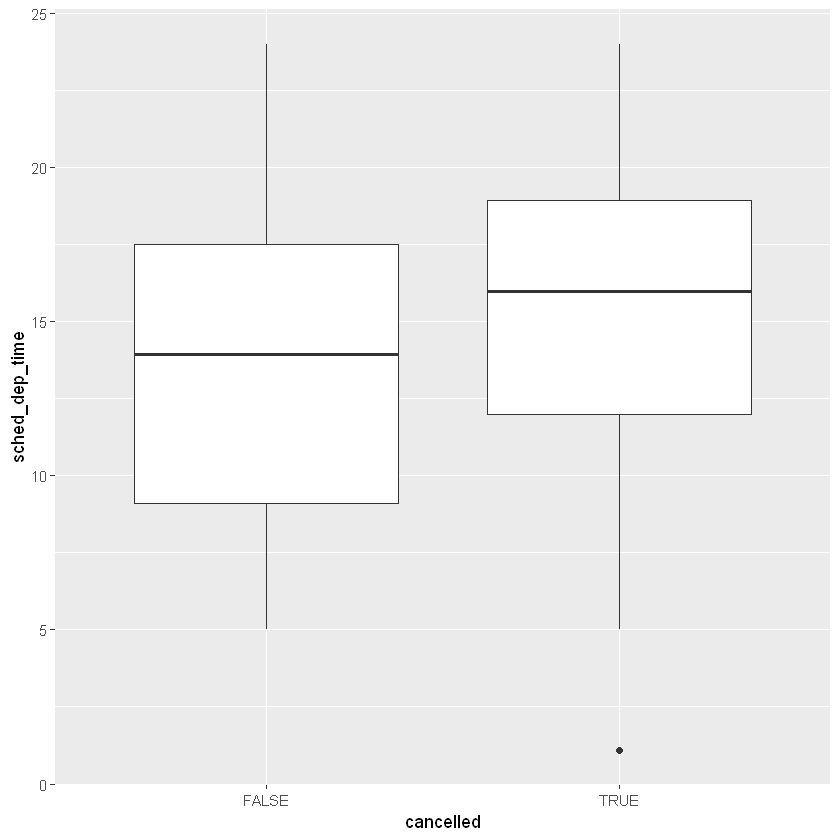

In [32]:
nycflights13::flights %>% 
    mutate(
        cancelled = is.na(dep_time),
        sched_hour = sched_dep_time %/% 100,
        sched_min = sched_dep_time %% 100,
        sched_dep_time = sched_hour + sched_min / 60
    ) %>% 
    ggplot(aes(cancelled, sched_dep_time)) +
        geom_boxplot()

In [33]:
glimpse(diamonds)

Observations: 53,940
Variables: 10
$ carat   <dbl> 0.23, 0.21, 0.23, 0.29, 0.31, 0.24, 0.24, 0.26, 0.22, 0.23,...
$ cut     <ord> Ideal, Premium, Good, Premium, Good, Very Good, Very Good, ...
$ color   <ord> E, E, E, I, J, J, I, H, E, H, J, J, F, J, E, E, I, J, J, J,...
$ clarity <ord> SI2, SI1, VS1, VS2, SI2, VVS2, VVS1, SI1, VS2, VS1, SI1, VS...
$ depth   <dbl> 61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4,...
$ table   <dbl> 55, 61, 65, 58, 58, 57, 57, 55, 61, 61, 55, 56, 61, 54, 62,...
$ price   <int> 326, 326, 327, 334, 335, 336, 336, 337, 337, 338, 339, 340,...
$ x       <dbl> 3.95, 3.89, 4.05, 4.20, 4.34, 3.94, 3.95, 4.07, 3.87, 4.00,...
$ y       <dbl> 3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 3.98, 4.11, 3.78, 4.05,...
$ z       <dbl> 2.43, 2.31, 2.31, 2.63, 2.75, 2.48, 2.47, 2.53, 2.49, 2.39,...


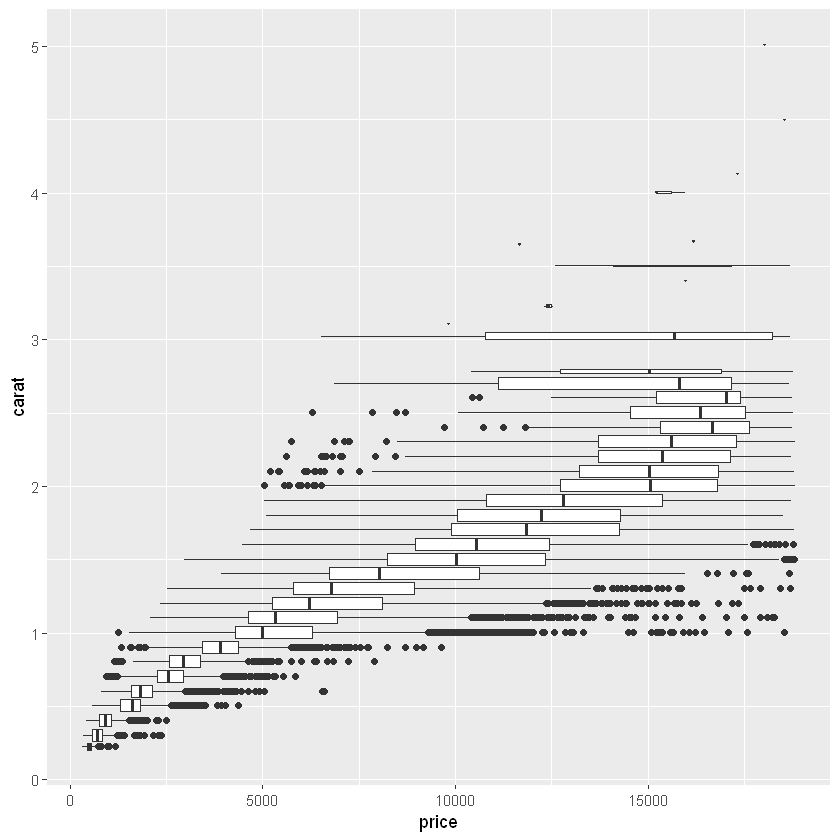

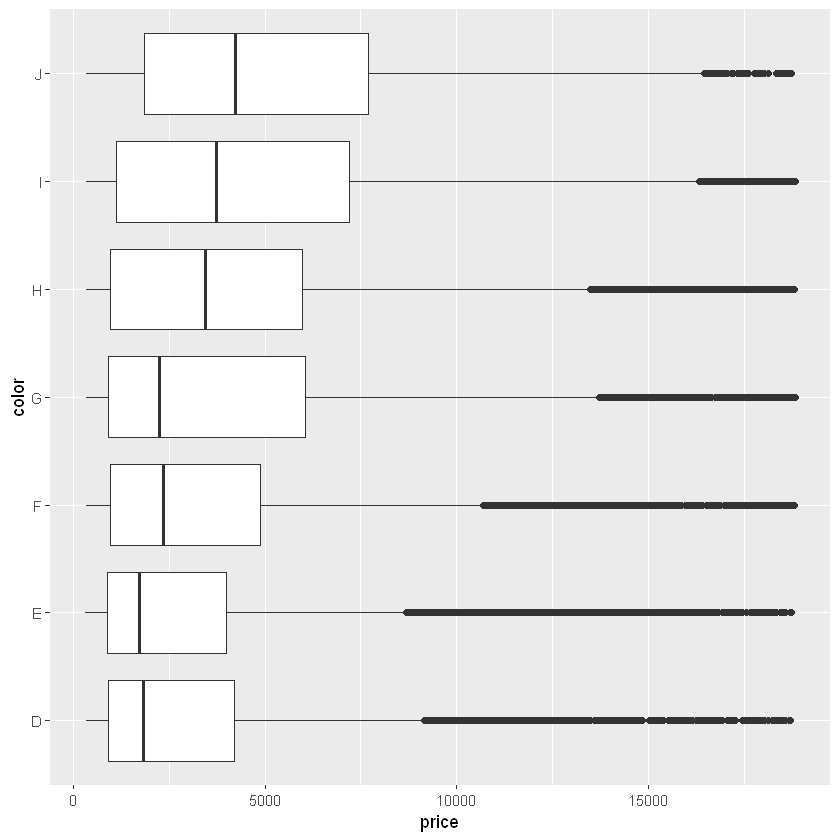

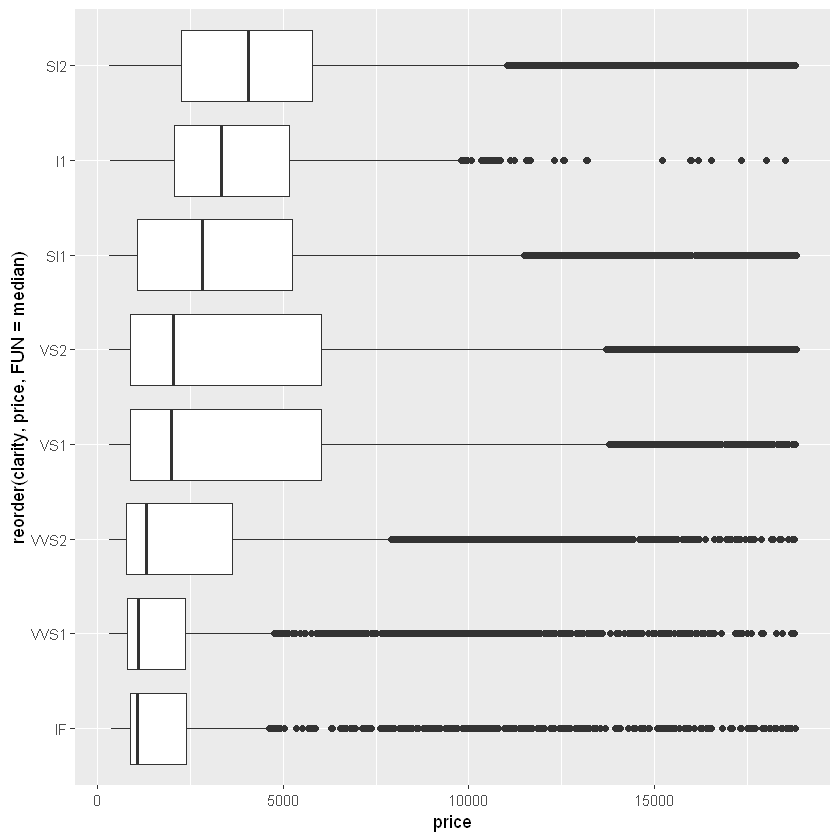

In [34]:
ggplot(diamonds, aes(carat, price)) + 
    geom_boxplot(mapping = aes(group = cut_width(carat, 0.1))) +
    coord_flip()

ggplot(diamonds, aes(color, price)) +
    geom_boxplot() +
    coord_flip()

ggplot(diamonds) +
    geom_boxplot(
        mapping = aes(
            x = reorder(clarity, price, FUN = median),
            y = price
        )
    ) +
    coord_flip()

* There is a weak negative relationship betwenn color and price. 
* There is also a weak negative relationship between clarity and price. 

For both color and clarity there is a much larger variation within each category than between categories. Carat is the single best predictor of diamond prices.

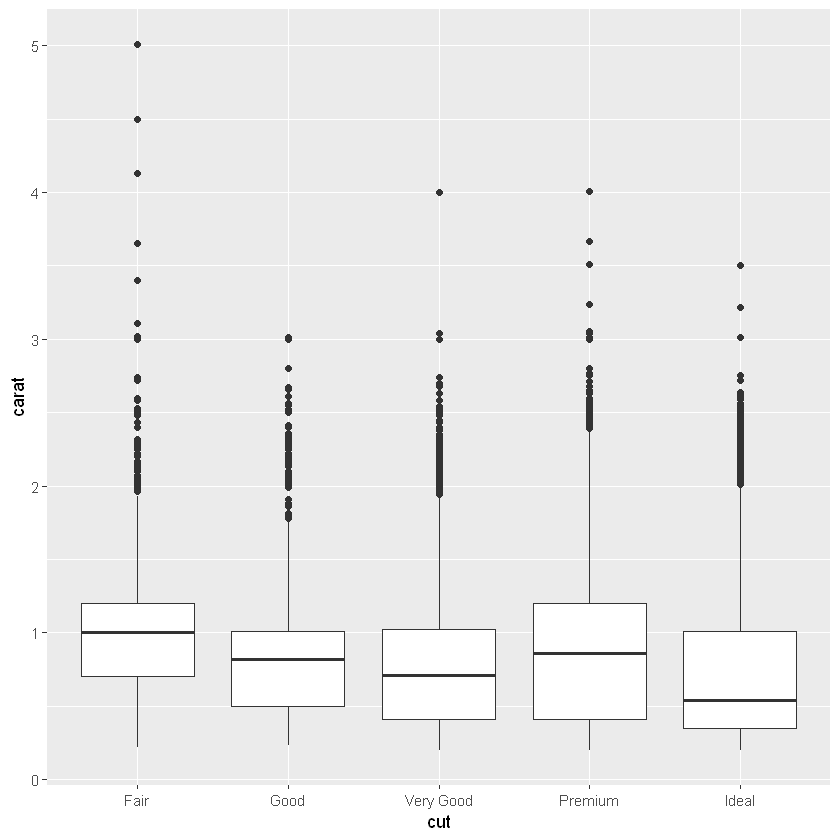

In [35]:
ggplot(diamonds, aes(cut, carat)) +
    geom_boxplot()

* There is a lot of variability in the distribution sizes within each cut category. There is a slight negative relationship betwenn carat and cut.

Note: The largest diamonds have a fair cut. This negative relationship can be due to the fact that, larger cut diamond can be profitably sold with a lower quality cut, while a smaller diamond requires a better cut.

In [36]:
#install.packages('lvplot')

In [37]:
library(lvplot)

Warning message:
"package 'lvplot' was built under R version 3.6.3"

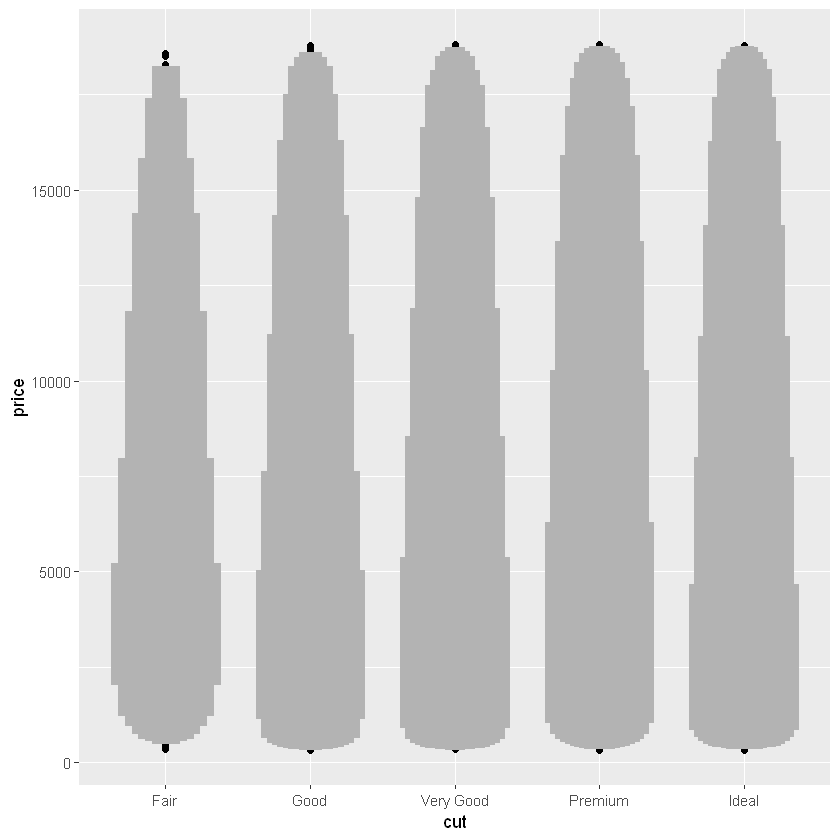

In [38]:
ggplot(diamonds, aes(cut, price)) +
    geom_lv()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


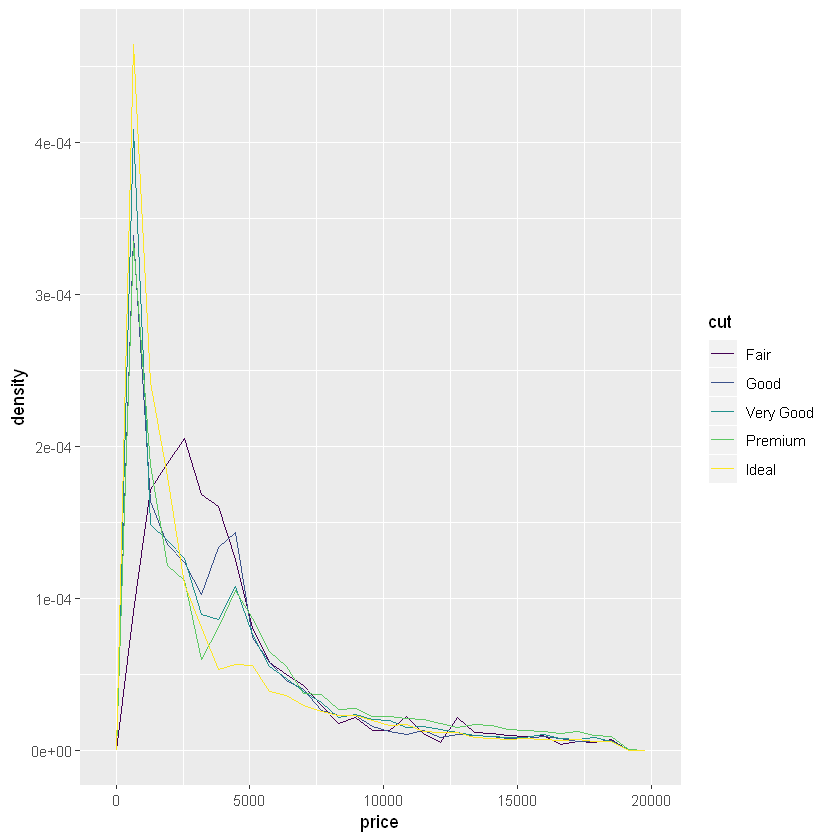

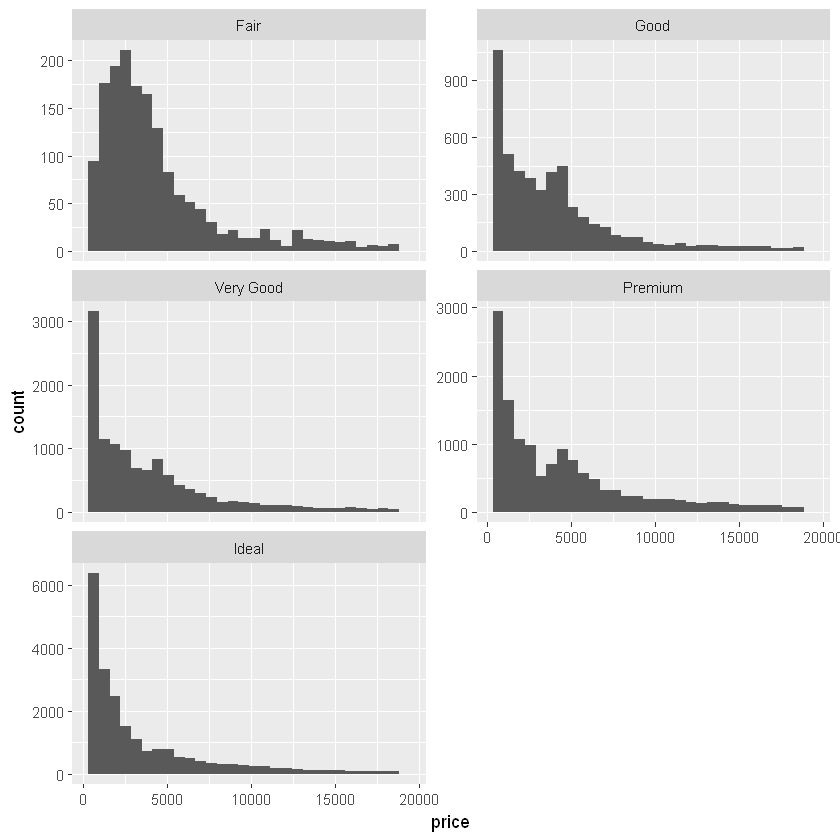

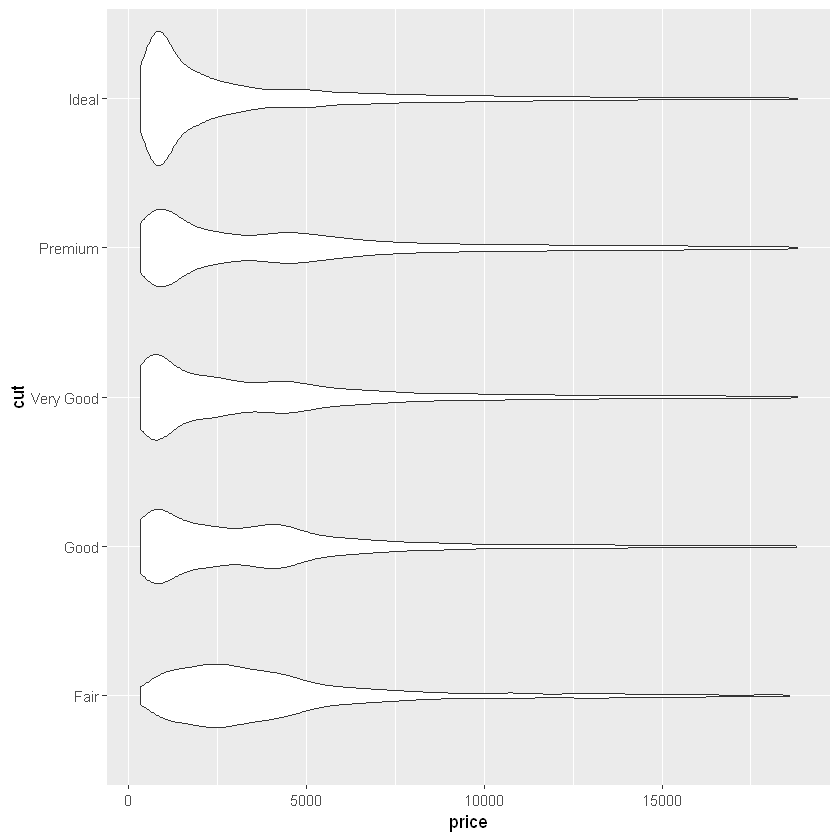

In [39]:
ggplot(diamonds) +
    geom_freqpoly(mapping = aes(price, ..density.., color = cut))
    
ggplot(diamonds) +
    geom_histogram(mapping = aes(price)) +
    facet_wrap(~cut, ncol = 2, scales = 'free_y') 

ggplot(diamonds) +
    geom_violin(mapping = aes(cut, price)) +
    coord_flip()

In [40]:
#install.packages('ggbeeswarm')

In [41]:
library(ggbeeswarm)

Warning message:
"package 'ggbeeswarm' was built under R version 3.6.3"

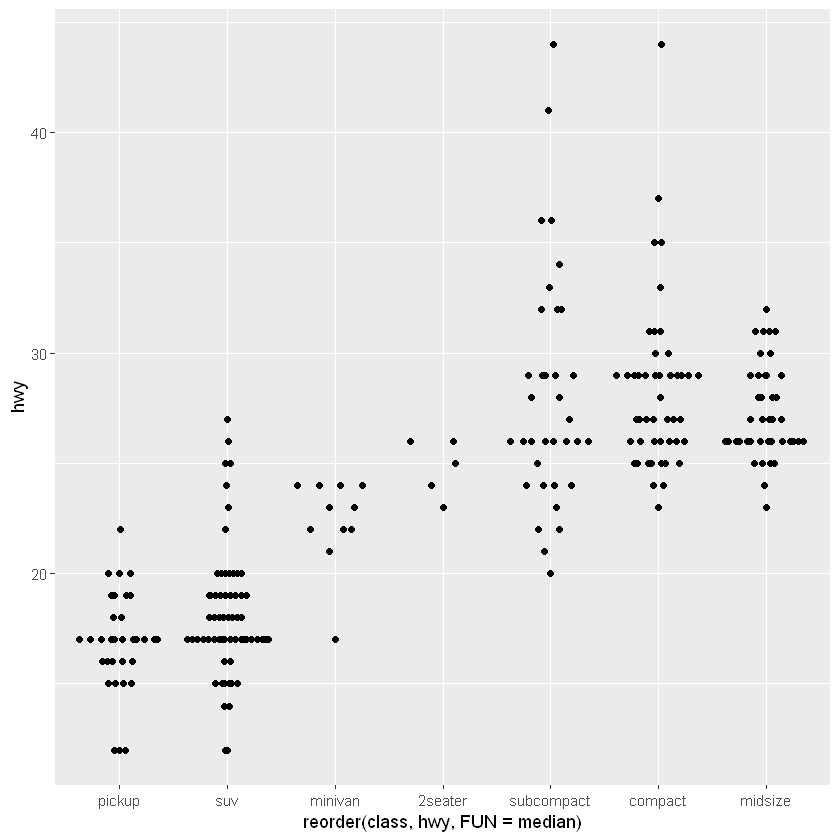

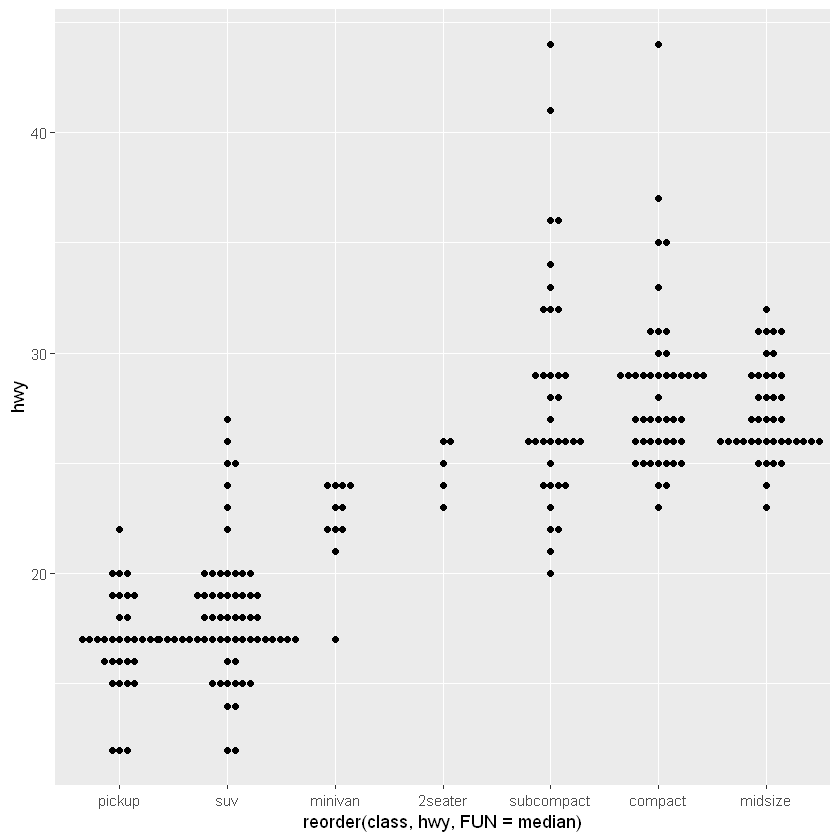

In [42]:
ggplot(mpg) +
    geom_quasirandom(
        mapping = aes(
            x = reorder(class, hwy, FUN = median),
            y = hwy
        )
    )

ggplot(mpg) +
    geom_beeswarm(
        mapping = aes(
            x = reorder(class, hwy, FUN = median),
            y = hwy
        )
    )

* geom_quasirandom() <- It produces plots that are mix of jitter and violin plots. There are several different methods (like, tukey, tukeyDense, frowney, smiley) that determine exactly how the random locations of points are generated.
* geom_beeswarm() <- It produces plots similar to the violin plots, but by offsetting the points.

# Two Categorical Variables

To visualize the covariation between the variables, cout the nuber of observations for each combination, use in-built function geom_count()

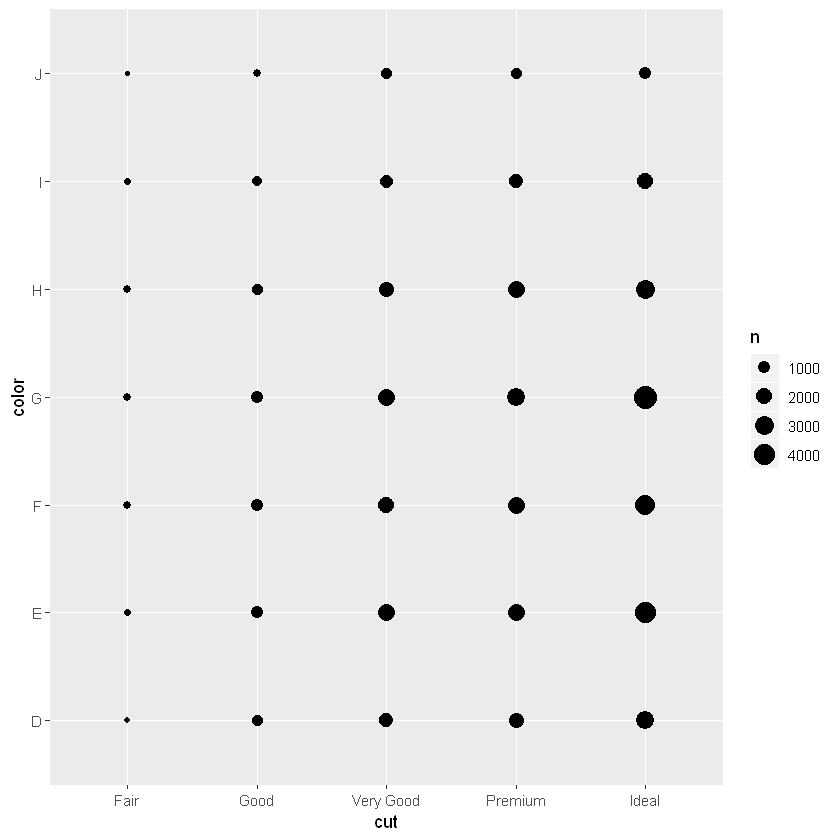

In [43]:
ggplot(diamonds, aes(cut, color)) +
    geom_count()

The size of each circle in the plot denotes how many observations occured at each combination of values. Covariation wil occur as the strong correlation between specific x and y values.

Another approach to compute count using dplyr.

In [44]:
diamonds %>% 
    count(color, cut)

color,cut,n
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337
E,Ideal,3903


Now, visualize with geom_tile() and the fill aesthetic.

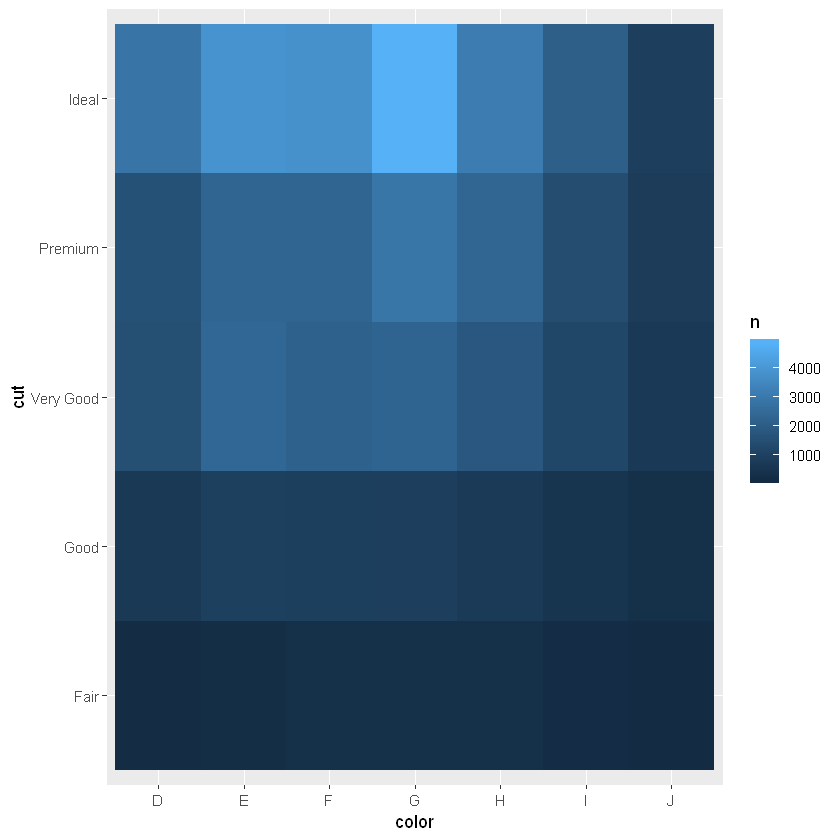

In [45]:
diamonds %>% 
    count(color, cut) %>% 
    ggplot(aes(color, cut)) +
        geom_tile(mapping = aes(fill = n))

If the categoricalvariable are unordered, use the "seriation" package to simultaneously reorder the rows and columns in order to more clearly reveal intresting patterns. 

For larger plots, try the "d3heatmap" and "heatmaply" packages which create interactive plots.

In [46]:
#install.packages('seriation')
#install.packages('d3heatmap')
#install.packages('heatmaply')

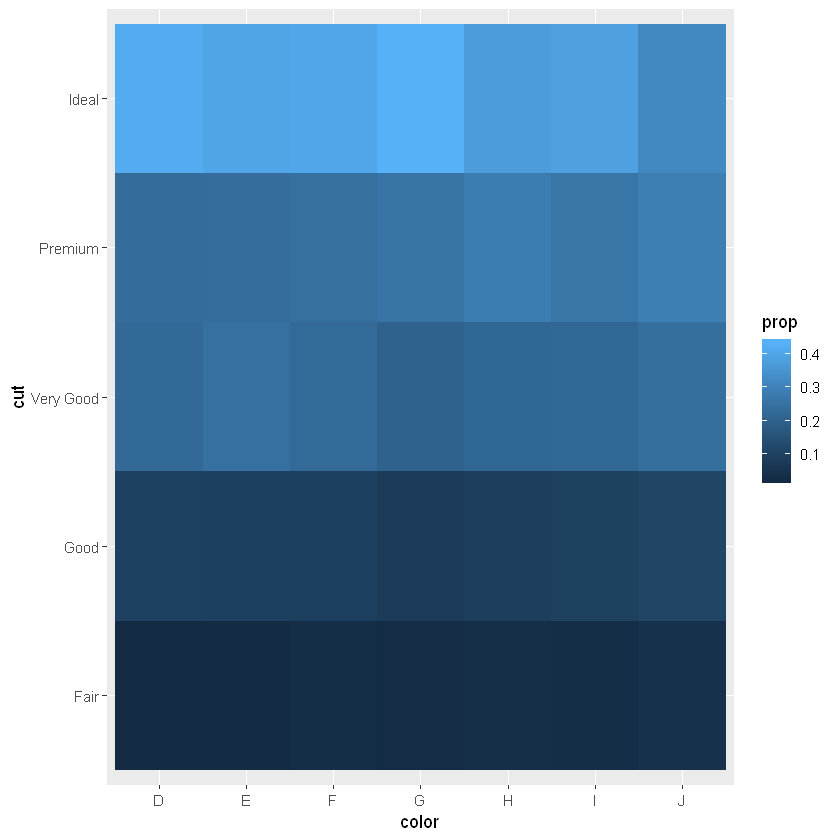

In [47]:
diamonds %>% 
    count(color, cut) %>% 
    group_by(color) %>% 
    mutate(prop = n/sum(n)) %>% 
    ggplot(aes(color, cut)) +
geom_tile(mapping = aes(fill = prop))

Its slightly better to use aes(x = color, y = cut) rather than aes(x = cut, y = color):


It’s usually better to use the categorical variable with a larger number of categories or the longer labels on the y axis. If at all possible, labels should be horizontal because that is easier to read.However, switching the order doesn’t result in overlapping labels.


Another justification, for switching the order is that the larger numbers are at the top when x = color and y = cut, and that lowers the cognitive burden of interpreting the plot.

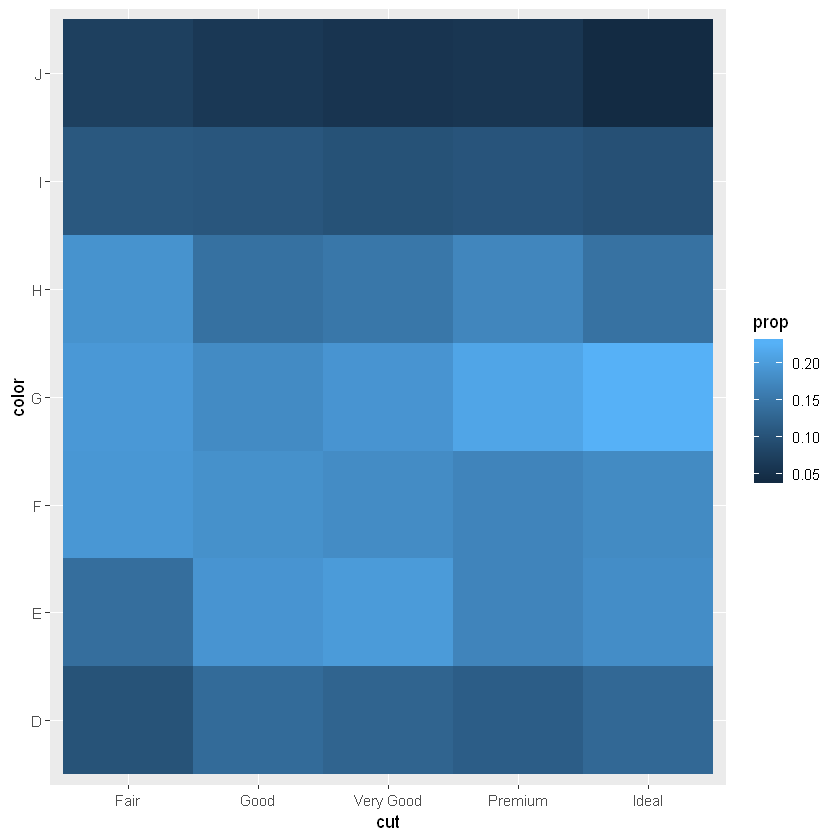

In [48]:
diamonds %>% 
    count(color, cut) %>% 
    group_by(cut) %>% 
    mutate(prop = n/sum(n)) %>% 
    ggplot(aes(cut, color)) +
        geom_tile(mapping = aes(fill = prop))

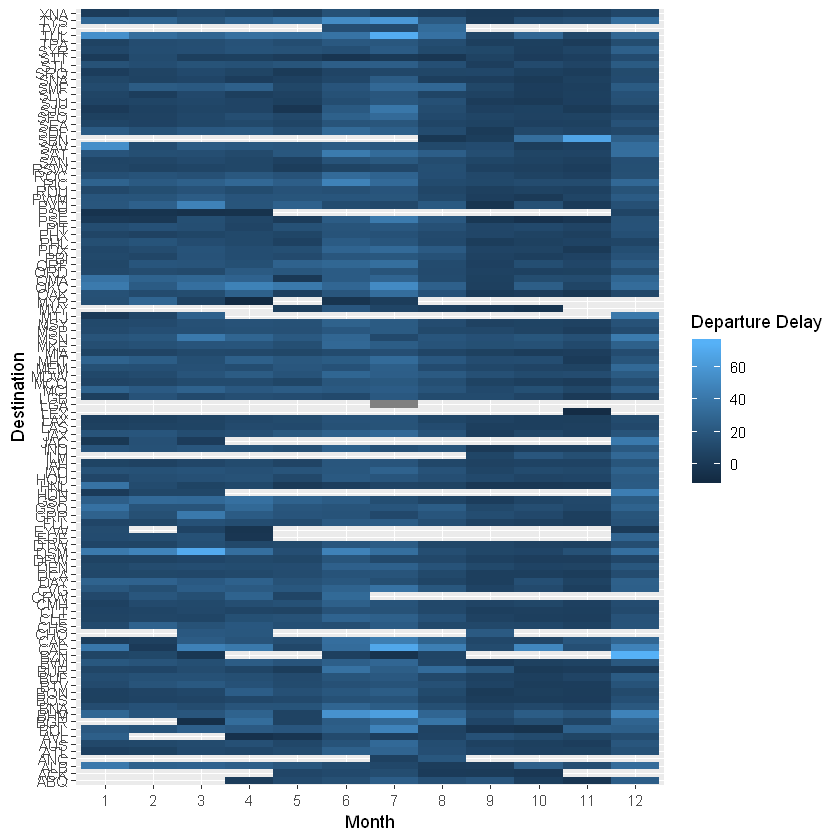

In [49]:
nycflights13::flights %>% 
    group_by(month, dest) %>% 
    summarize(dep_delay = mean(dep_delay, na.rm = TRUE)) %>% 
    ggplot(aes(factor(month), dest, fill = dep_delay)) +
        geom_tile() +
        labs(x = 'Month', y = 'Destination', fill = 'Departure Delay')

The average flight delays in accordance with the variation in destination and month of the year. To improve the plot, several things could be done:
* Sort destination by a meaningful quantity (like distance, number of flights, average delay).
* Remove missing values.
* Treat missing values.

Note <- Treating missing values is a difficult thing, because in this case the missing values corresponds to the airports which do not have regular flights (atleast one per month) from NYC. This means these destinations likely have smaller airports. When the grouping is done of all pairs of (month, dest) again by dest, we get a count of 12 (one per month) for each group (dest). This makes it easier to filter.

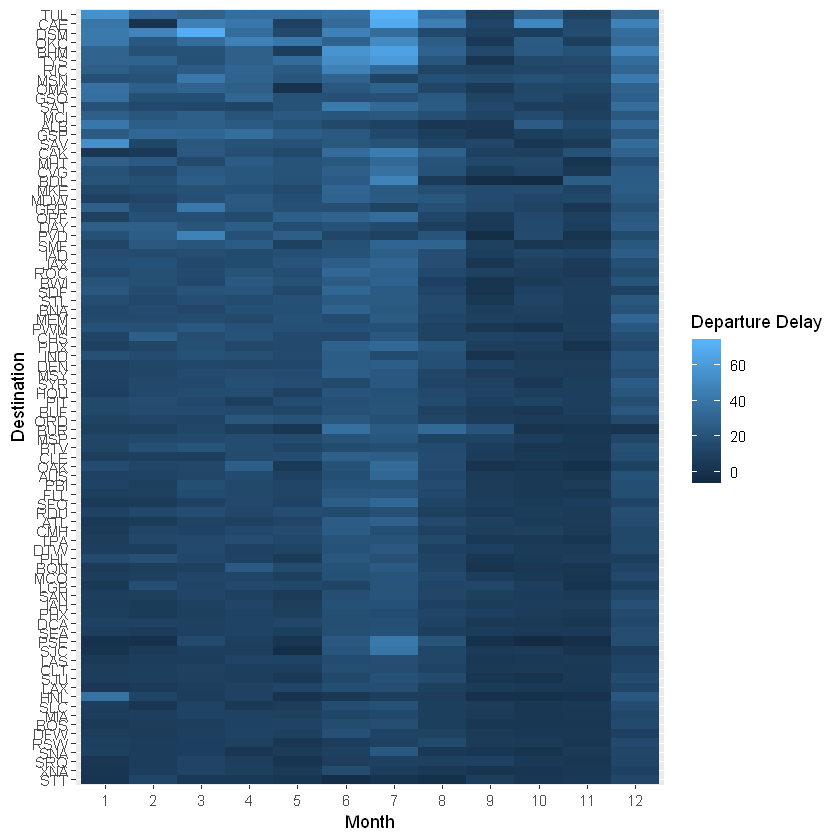

In [50]:
nycflights13::flights %>% 
    group_by(dest, month) %>% 
    summarize(dep_delay = mean(dep_delay, na.rm = TRUE)) %>% 
    group_by(dest) %>% 
    filter(n() == 12) %>% 
    ungroup() %>% 
    mutate(dest = reorder(dest, dep_delay)) %>% 
    ggplot(aes(factor(month), dest, fill = dep_delay)) +
        geom_tile() +
        labs(x = 'Month', y = "Destination", fill = 'Departure Delay')

# Two Continuous Variables
To visualize the covariation betwenn two continuous variable, plot a scatterplot using geom_point().

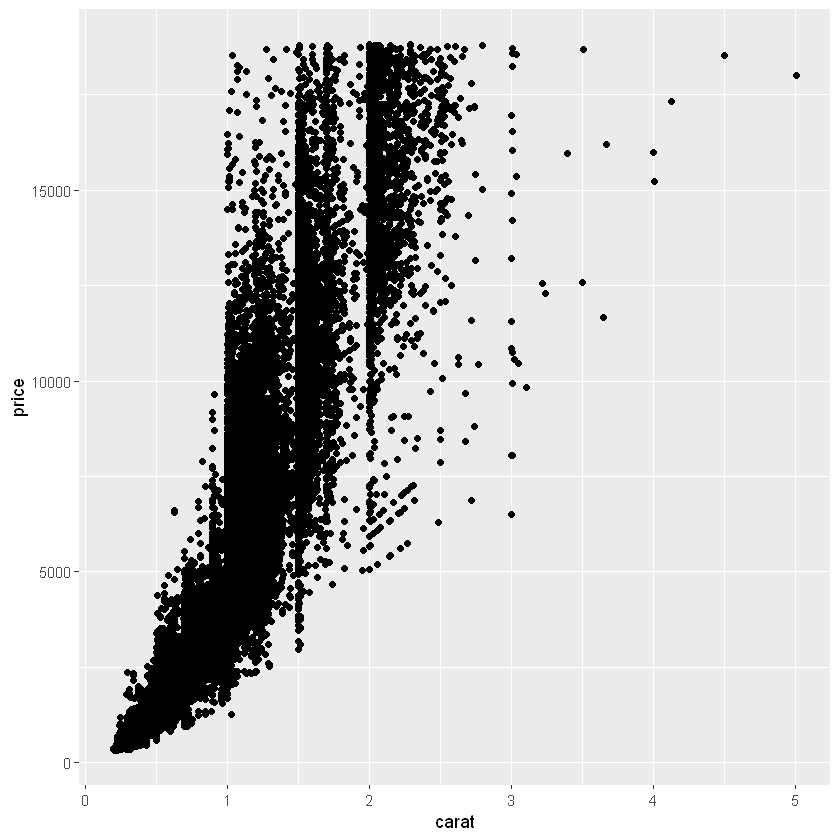

In [51]:
ggplot(diamonds, aes(carat, price)) + 
    geom_point()

The above scatterplot shows an exponential relationship between the carat v/s price.

Scatterplot become less useful when the size of the dataset increases, because points begin to overplot, and pile-up inot area of uniform black. To fix this issue, use alpha asthetic to add transparency.

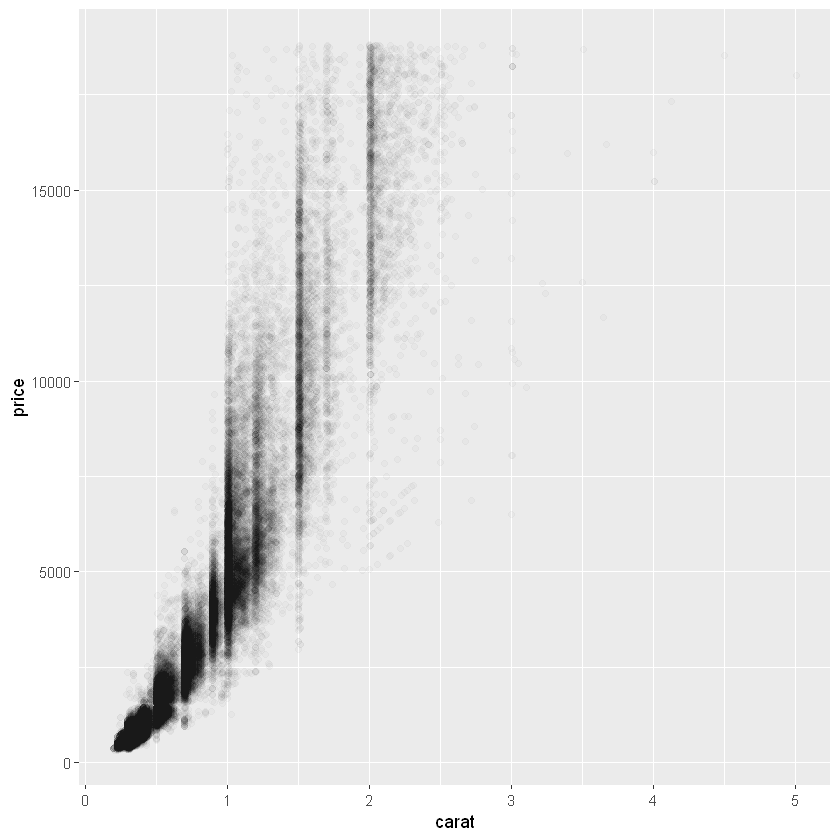

In [52]:
ggplot(diamonds, aes(carat, price)) + 
    geom_point(alpha = 1/50)

But, using transparency can be challenging for very large datasets.

Another way to solve this issue is to use bin. Use geom_bin2d() and geom_hex() functions to bin in two dimensions. These functions divide the coordinate planes into 2D bins and then use a fill color to display how many points fall in each bin.
* geom_bin2d() creates rectangular bins. 
* geom_hex() creates hexagonal bins.

Note <- Install hexbin package to use geom_hex() function.

In [53]:
#install.packages('hexbin')

Warning message:
"package 'hexbin' was built under R version 3.6.3"

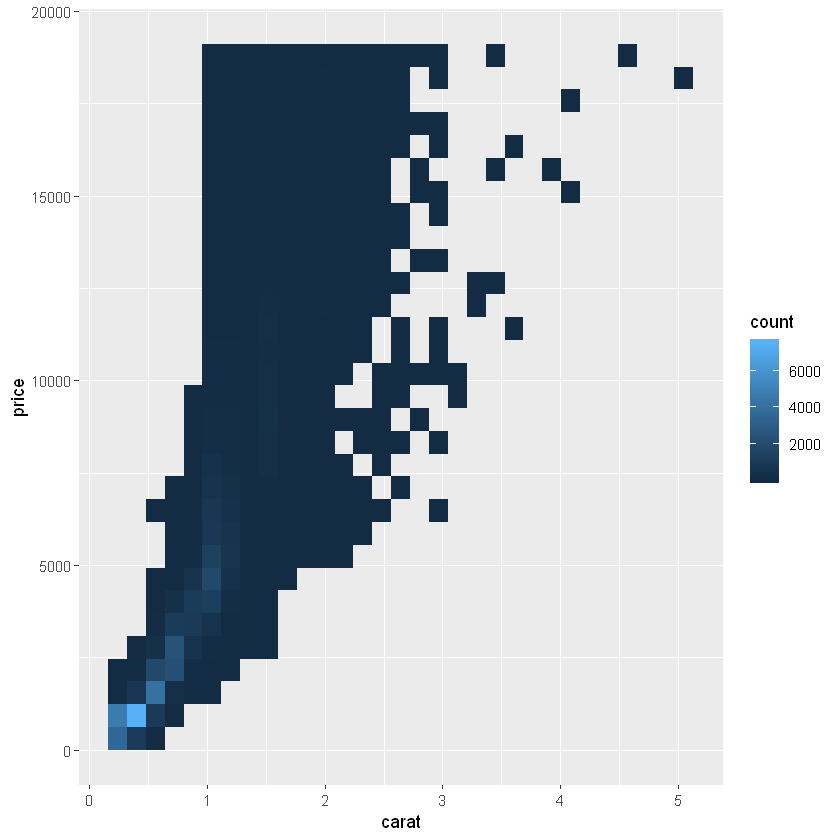

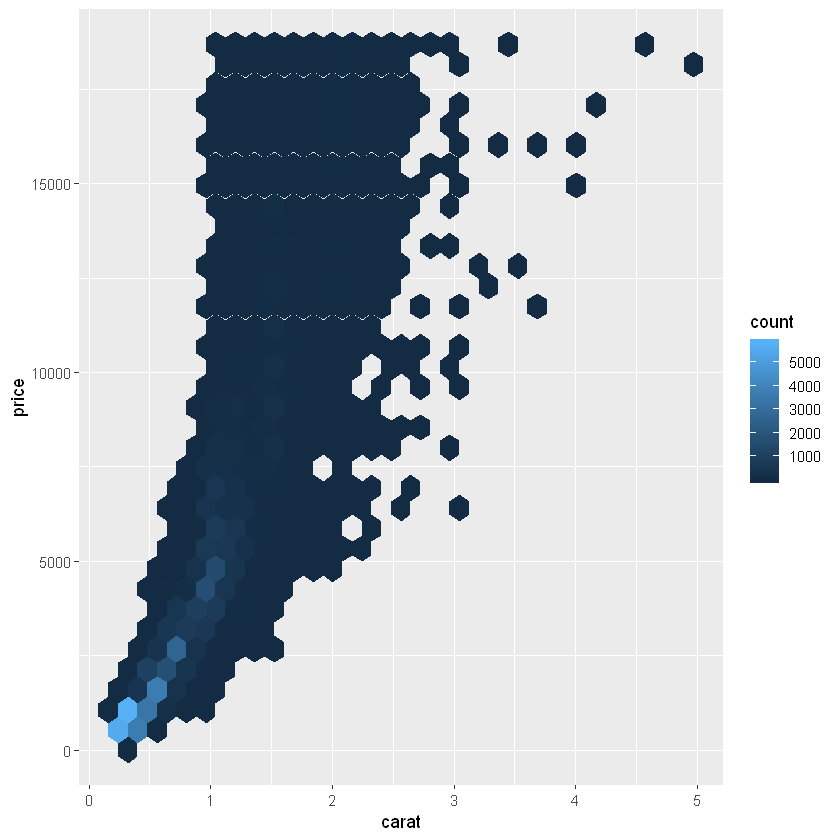

In [54]:
ggplot(diamonds, aes(carat, price)) +
    geom_bin2d()

library(hexbin)
ggplot(diamonds, aes(carat, price)) +
    geom_hex()

Another option is to bin a continuous variable so it acts as a categorical variable. Then use techniques to visualize a combination of continuous and categorical variable. For eg, bin carat and then for each group, display boxplot.

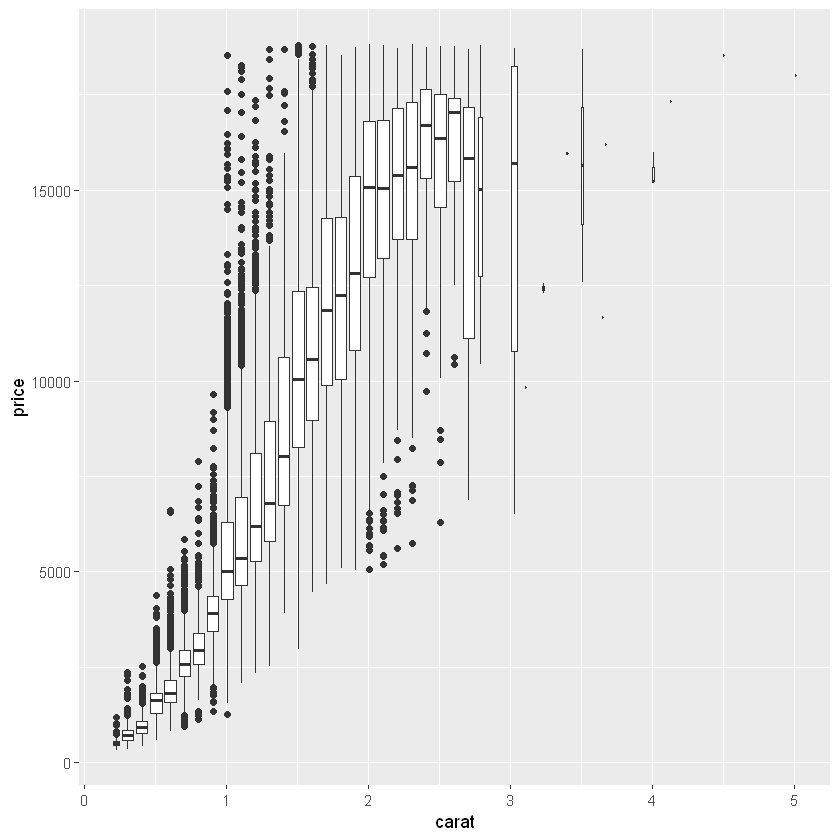

In [55]:
ggplot(diamonds, aes(carat, price)) +
    geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))

cut_width(x, width), divides "x" in the bins of width "width".

The boxplot looks the same, irrespective of the number of observations used to plot it. To show number of observations, make the boxplot proportional to the number of points with varwidth = TRUE.

Another option is to plot approximately same number of points in each bin, use cut_number() function in group aesthetic.

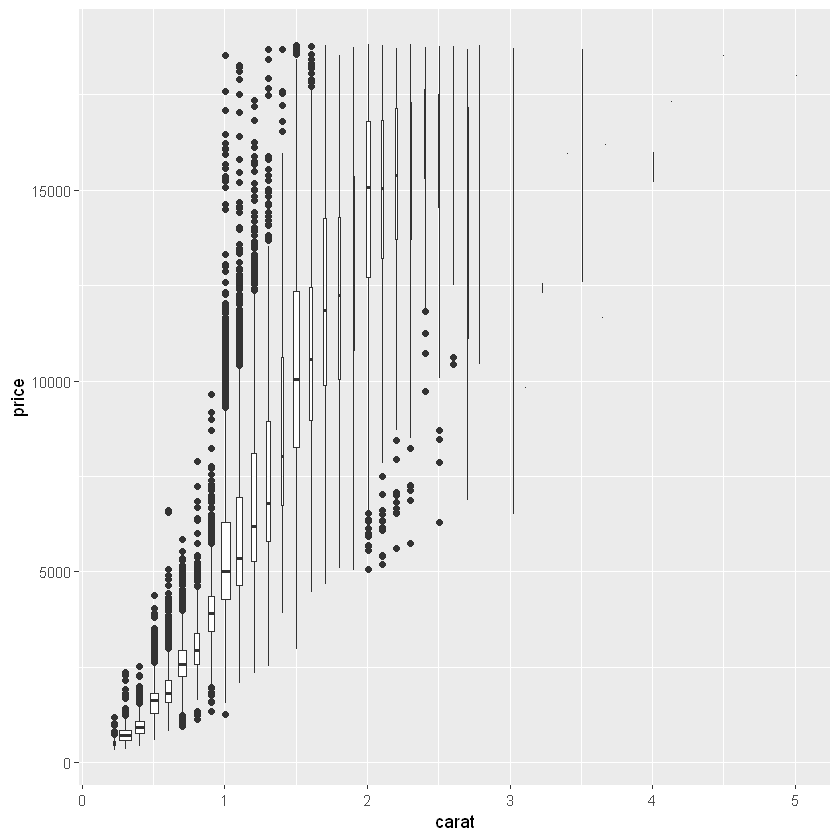

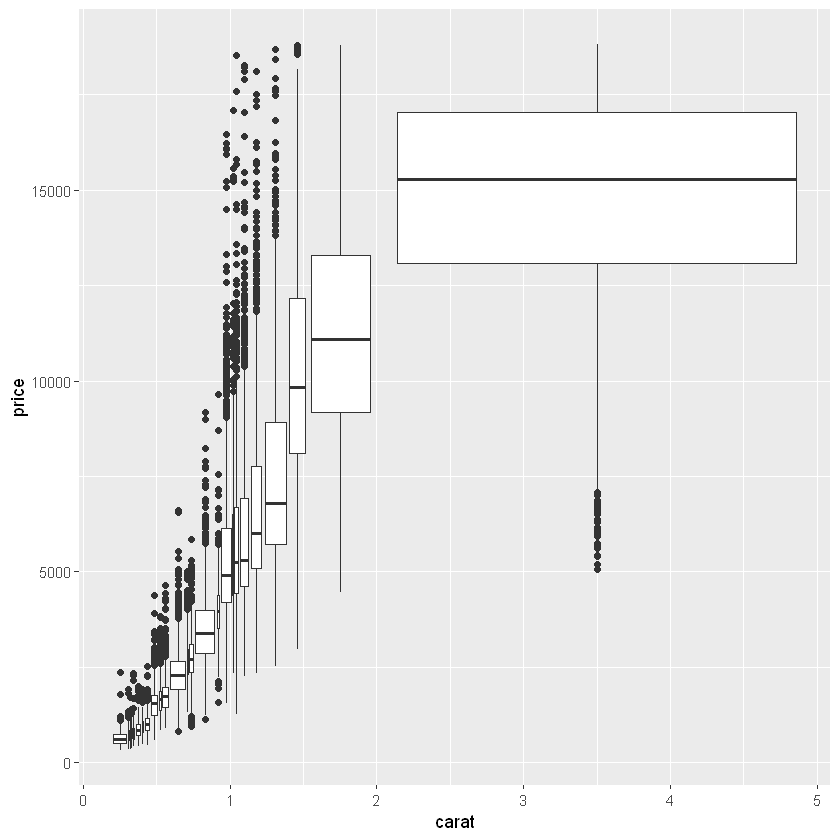

In [56]:
# Boxplot proportional to the number of observations used to plot it
ggplot(diamonds, aes(carat, price)) +
    geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)), varwidth = TRUE)

# Boxplot with approximately same number of points in each bin
ggplot(diamonds, aes(carat, price)) + 
    geom_boxplot(mapping = aes(group = cut_number(carat, 25)))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


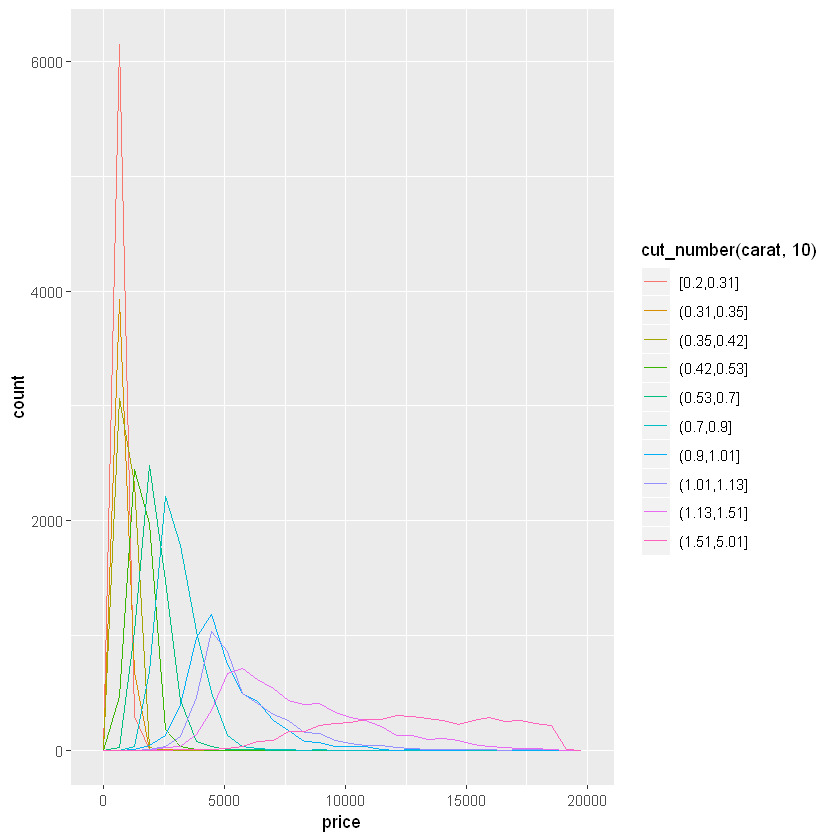

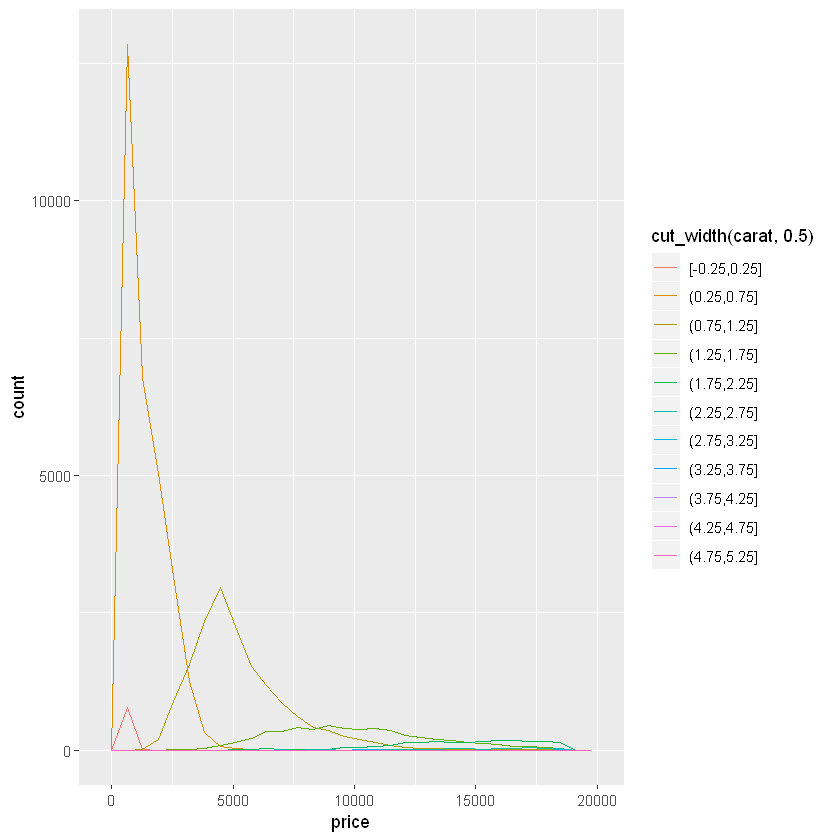

In [57]:
ggplot(diamonds, aes(price)) +
    geom_freqpoly(mapping = aes(color = cut_number(carat, 10)))

ggplot(diamonds, aes(price)) +
    geom_freqpoly(mapping = aes(color = cut_width(carat, 0.5)))

Both cut_width() and cut_number() split a variable into groups. When using cut_width(), we need to choose the width, and the number of bins will be calculated automatically. When using cut_number(), we need to specify the number of bins, and the widths will be calculated automatically.

In either case, we want to choose the bin widths and number to be large enough to aggregate observations to remove noise, but not so large as to remove all the signal.

If categorical colors are used, no more than eight colors should be used in order to keep them distinct.

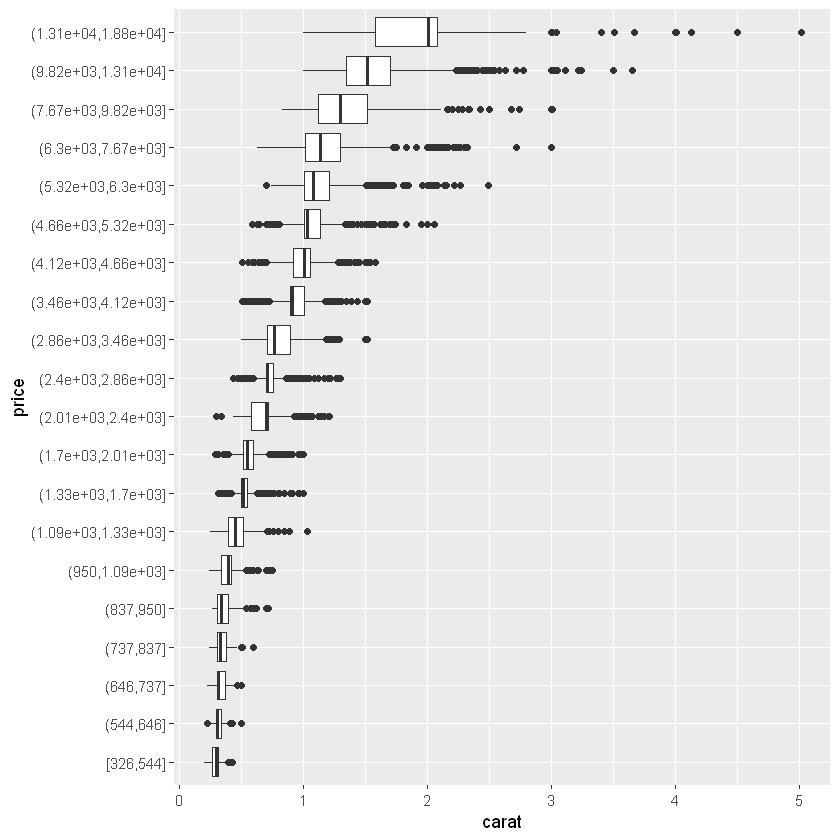

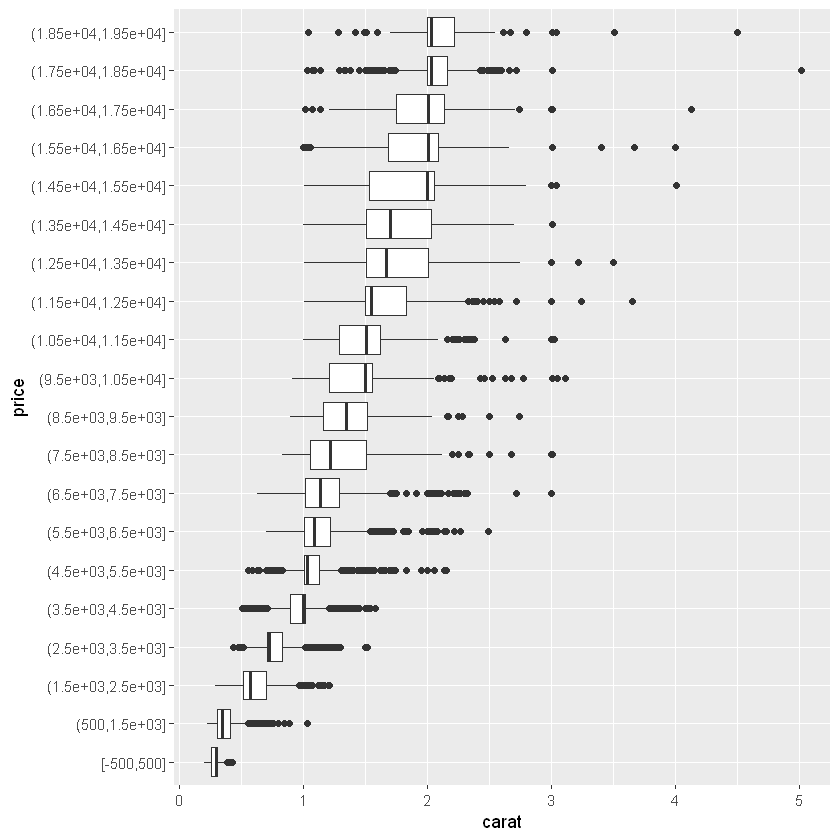

In [58]:
# Distribution of carat partioned with price
ggplot(diamonds, aes(cut_number(price, 20), carat)) + 
    geom_boxplot() +
    coord_flip() +
    xlab('price')

ggplot(diamonds, aes(cut_width(price, 1000), carat)) +
    geom_boxplot() +
    coord_flip() +
    xlab('price')

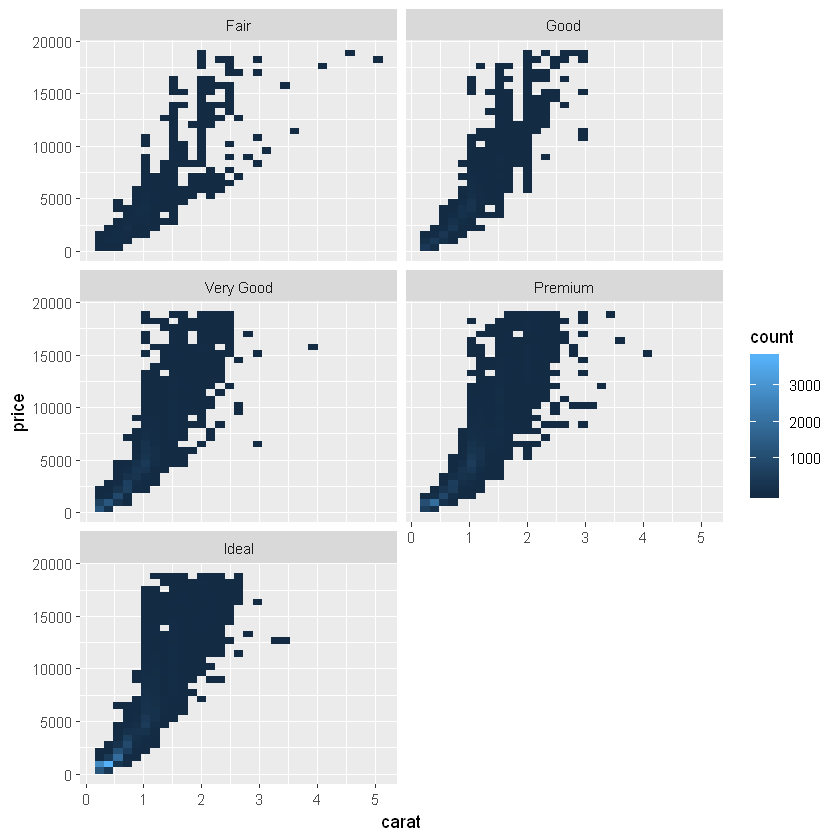

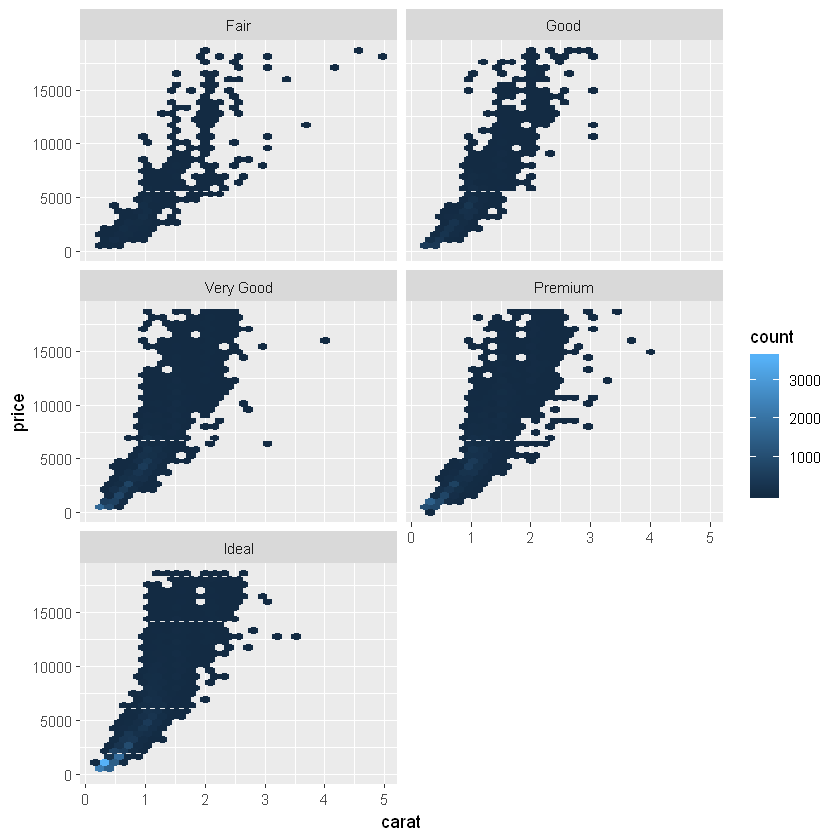

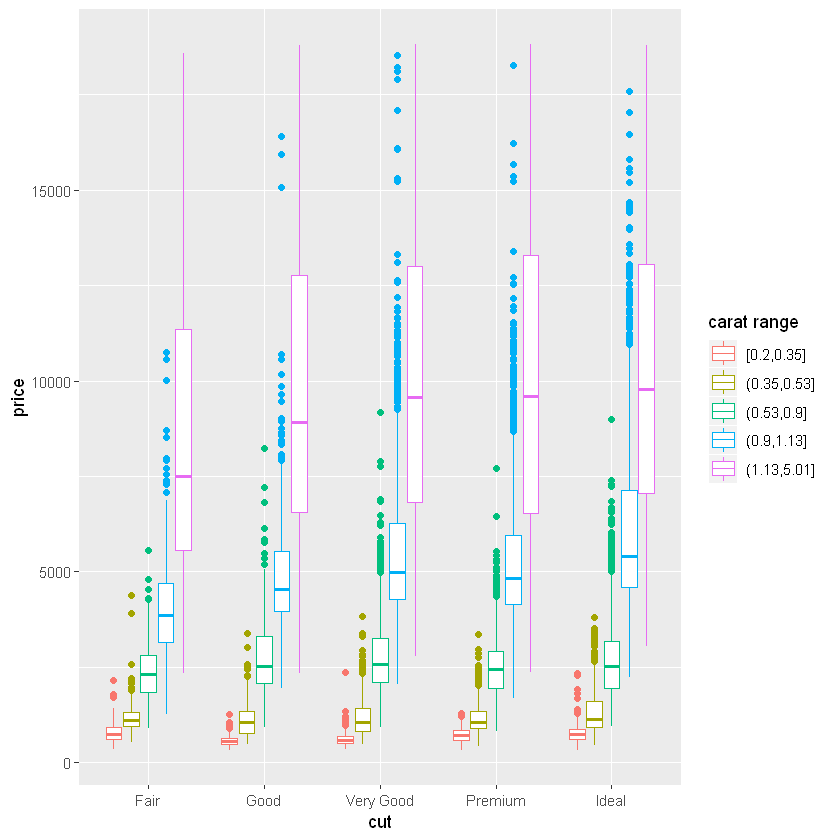

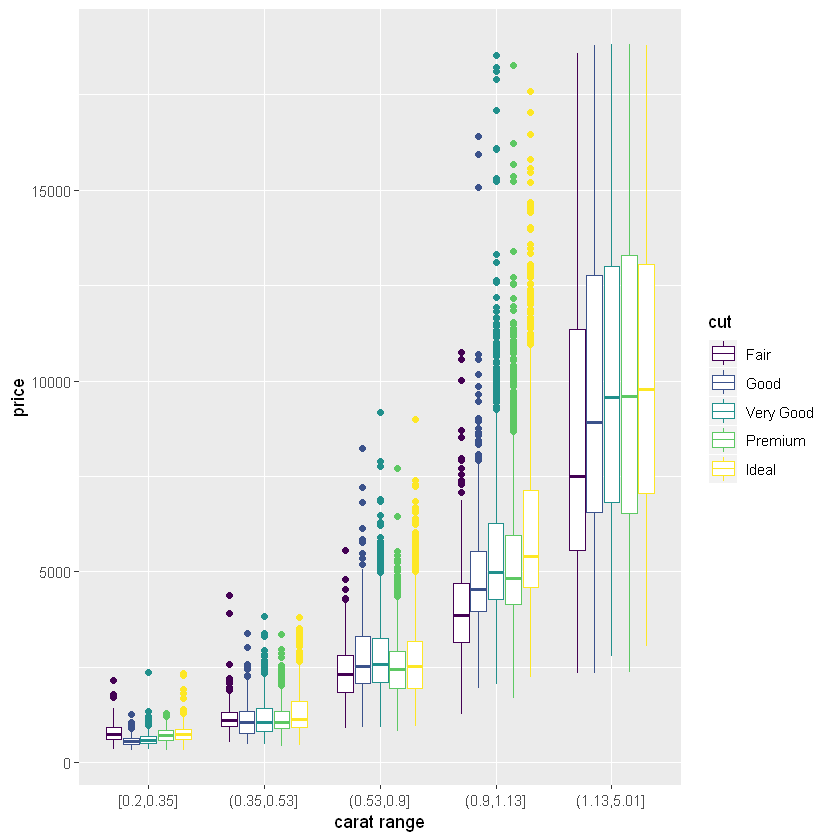

In [59]:
# Combined distribution of cut, carat and price.

ggplot(diamonds, aes(carat, price)) +
    geom_bin2d() +
    facet_wrap(~cut, ncol = 2)

ggplot(diamonds, aes(carat, price)) +
    geom_hex() +
    facet_wrap(~cut, ncol = 2)

ggplot(diamonds, aes(cut, price)) +
    geom_boxplot(mapping = aes(color = cut_number(carat, 5))) +
    labs(color = 'carat range')

ggplot(diamonds, aes(cut_number(carat, 5), price)) +
    geom_boxplot(mapping = aes(color = cut)) +
    xlab('carat range')


# Patterns and Models
Patterns provide clues about relationships, if systematic relationship exists. If a pattern is spotted:
* Could this pattern be due to coincidence (i.e. random choice)?
* How can you describe the relatoinship implied by the pattern?
* How strong is the relationship implied by the pattern?
* What other variables might affect the relationship?
* Does the relationship change if you look at imdividual subgroups of data?

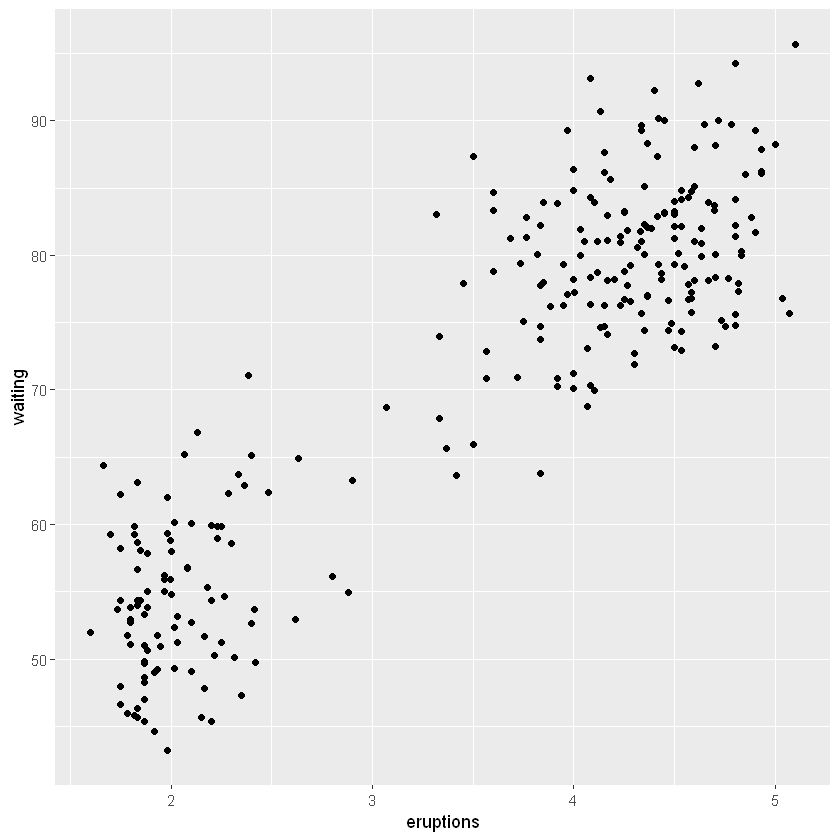

In [60]:
ggplot(faithful, aes(eruptions, waiting)) +
    geom_jitter()

Eruption lengths versus the wait time between the eruptions show a pattern as "longer wait-time are associated with longer eruptions". The above scatterplot also displays two clusters.

Patterns reveal covariation. Variation is a phenomenon that creates uncertainity, covariation is a phenomenon that reduces it. If two variables covary, then using values of 1st variable improves prediction of values for 2nd variable. If a covariation is due to a casual relationship (a special case), then use value of 1st variable to control value of 2nd variable.

Models are tools for extracting pattern out of data.

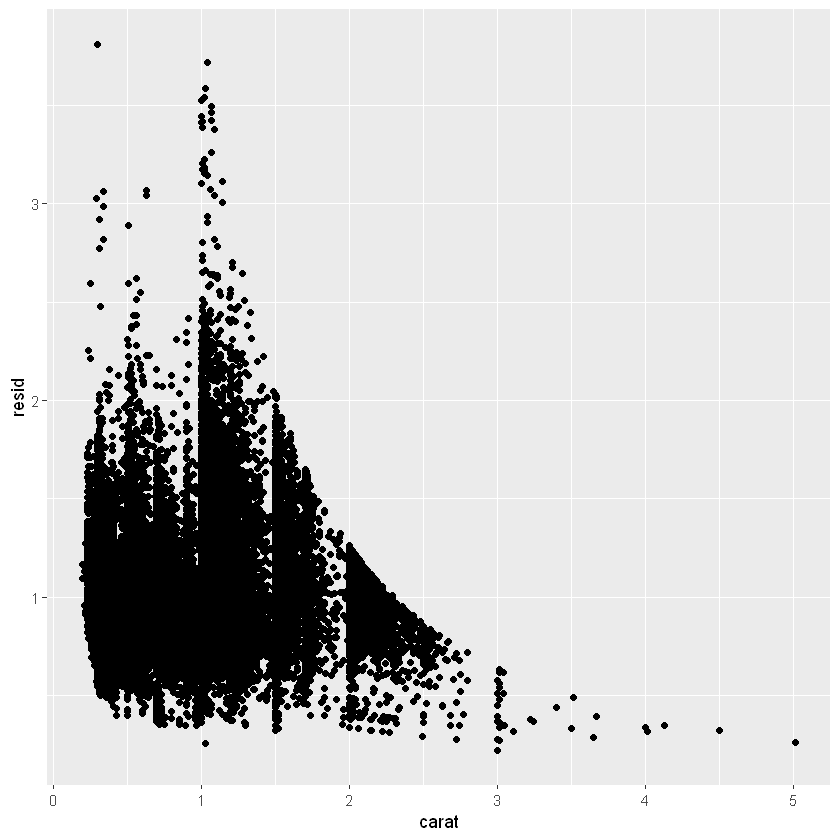

In [61]:
library(modelr)

mod <- lm(log(price) ~ log(carat), data = diamonds)

diamonds2 <- diamonds %>% 
    add_residuals(mod) %>% 
    mutate(resid = exp(resid))

ggplot(diamonds2, aes(carat, resid)) +
    geom_point()

The following code fits a model that predicts price from carat and then compute residuals (the difference between predicted value and actual value). The residuals give us a view of price fo diamonds once the effect of carat has been removed. 

Once the strong relationship between carat and price is removed, the expected relationship between cut and price is revealed as "relative to their size, better quality diamonds are more expensive".

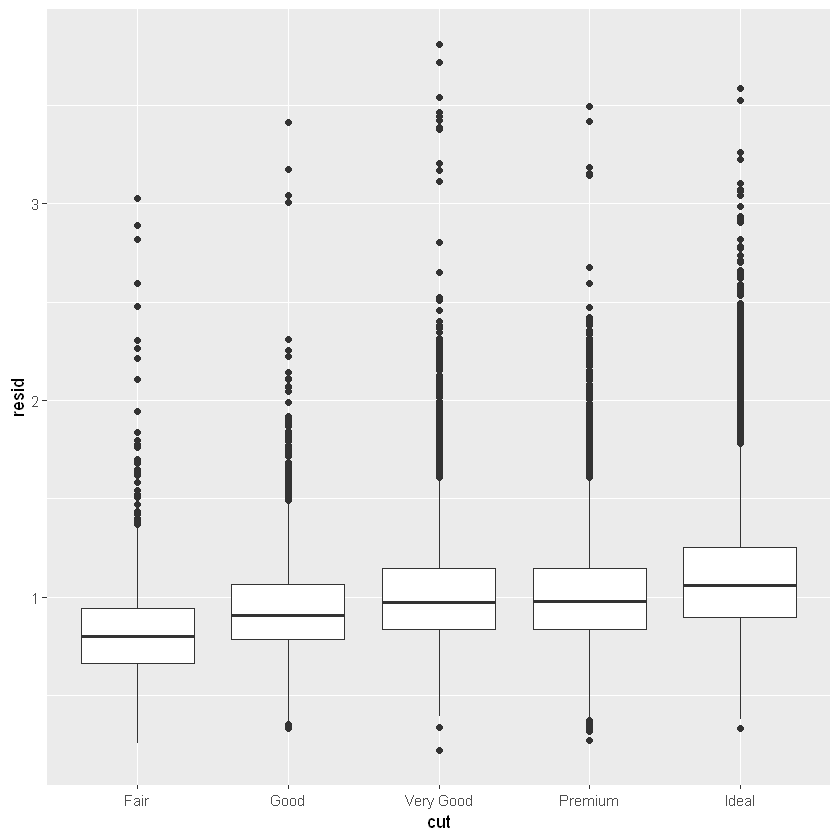

In [62]:
ggplot(diamonds2, aes(cut, resid)) +
    geom_boxplot()

# ggplot2 Calls
Turn the end of pipeline data transformation into a plot. Watch for transformation from %>% to +. This transition wasn't necessary but unfortunately ggplot2 was created before pipe was discovered.

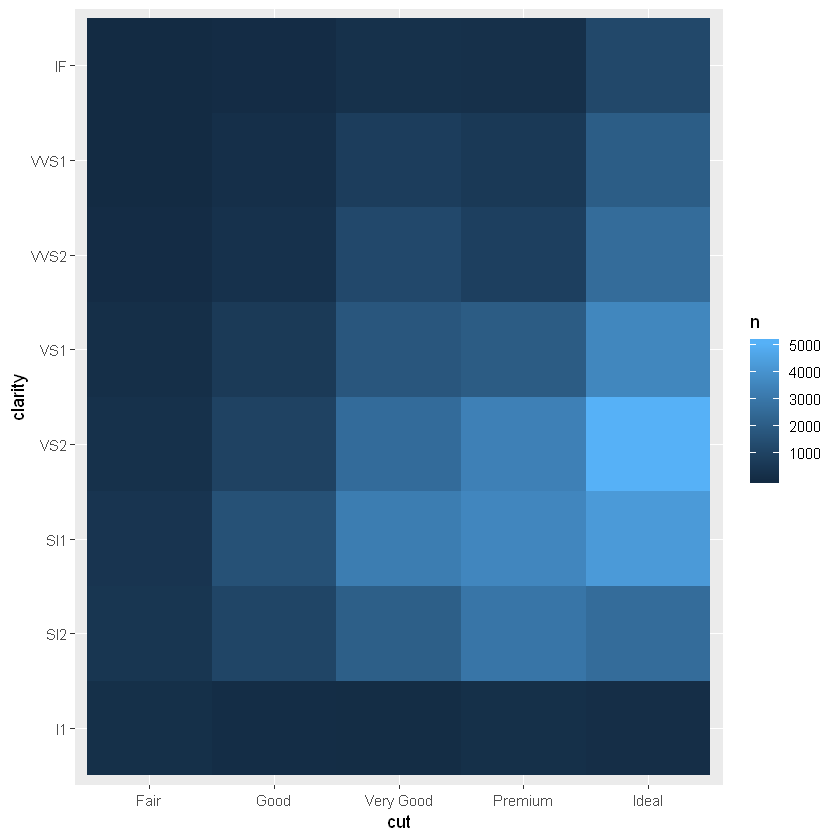

In [63]:
diamonds %>% 
    count(cut, clarity) %>% 
    ggplot(aes(cut, clarity)) +
        geom_tile(aes(fill = n))